# Aircraft Risk Assessment for Aircraft Investment

## 1. Business Understanding
### 1.1 Background

Huru Capital Investments Group is a Venture Capital firm with a presence in the construction, real estate and logistics sector in the United States of America. Given its strategic goal to diversify its portfolio, the company is exploring expansion into high growth industries such as the aviation sector. This decision is driven by the expected growth in regional and international air transport. 

The Company intends to purchase and operate airplanes for commercial and private use and hence safety is a critical consideration in selecting the right aircraft.

To support this move, Huru Capital Investments Group is leveraging historical aviation accident data from 1962 to 2023 using a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board to evaluate potential risks associated with various types of aircraft. This analysis will inform executive decision making on which aircraft models offer the best balance between performance and operational safety.

### 1.2 Objectives

The overall objective of this project is to identify the types of aircraft with the lowest historical risk profile based on accident frequency, severity and related factors. These insights will guide Huru Capital's aviation investment strategy by pinpointing safe and reliable aircraft for acquisition.

The specific objectives are:
* To analyse accident frequency and the severity by the type of aircraft
* To identify trends  and patterns related to aviation accidents and incidents over time and geographical location
* To recommend the top three types of aircraft for investment based on safety performance

### 1.3 Problem Statement

Huru Capital Investments Group is interested in entering the aviation industry without any internal expertise on the potential risks of aircraft. Given the potential financial and reputational risks associated with aviation accidents, the company must base its aircraft selection on data-driven insights. 

This analysis will help answer the following question:

> *Which types of aircraft present the lowest investment risk based on historical safety records?*

### 1.4 Metrics of Success

This project will be considered successful if:

* The analysis identifies aircraft types with historically low accident and fatality rates, helping the company make informed investment decisions.
* At least three clear evidence based recommendations are provided to guide aircraft acquisition
* Key safety patterns (by aircraft type, location, cause or time) are clearly visualised making the risks and opportunities easy to interpret
* The insights directly support Huru Capital's broader goal of expanding into new industries with minimised operational and reputational risk

## 2. Data Understanding

This entails an initial data exploration so as to get an understanding of the shape, structure, contents and quality of the data. 

The data to be utilised in this analysis is drawn from the National Transportation Safety Board Database which contains information from 1962 to 2023 on civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 

The source of the dataset is https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

The dataset has two csv files:
* AviationData.csv
* USState_Codes.csv

The aim of this is to:
* identify key variables and their data types
* detect missing or inconsistent values
* gain familiarity with trends, distributions or anomalies

In [1]:
#import the relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Initial Data Exploration of Aviation Data

In [2]:
#load the aviation dataset
aviation_df = pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\rotic\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#preview the first 5 rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#preview the last 5 rows
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


#### Observation

The dataset is uniform from top to bottom

In [5]:
#get the shape of the dataframe (no of rows, no of columns)
aviation_df.shape

(88889, 31)

In [6]:
#get the summary of information on the aviation dataframe
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Observation

The Aviation Dataframe has **88889 rows** and **31 columns**.
It is composed of two data types:
* Numerical data - Float (5 columns)
* Categorical data - Object (26 columns)

27 columns have null values (float(5) and object(22)) with varying null values. The key columns with null values that will need to be cleaned during preparation for analysis are:
* Severity of Injuries
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured
* Aircraft Make
* Aircraft Model
* Location
* Event Date
* Weather Condition
* Number of Engines
* Type of Engines
* Purpose of Flight
* Broad Phase of Flight

There is information on date provided under the Event Date and Publication Date columns which is represented as object data type but should be converted into date-time data type to allow for trend analysis.

The Location column contains information in both uppercase and lowercase which should be standardised for parsing.

Many events have **zero fatalities** which are still important for identifying incident prone aircraft.

In [7]:
# getting concise statistical summary of numerical data
aviation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
# getting concise statistical summary of categorical data
aviation_df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,WPR22LA201,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


### 2.2 Initial Data Exploration of US State Codes data

In [9]:
#Load the US State Codes dataset
USStateCodes_df = pd.read_csv('Data/USState_Codes.csv', encoding='latin-1')

In [10]:
#Preview the first 5 rows
USStateCodes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [11]:
USStateCodes_df.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


#### Observation

The dataset is uniform from top to bottom

In [12]:
USStateCodes_df.shape

(62, 2)

In [13]:
USStateCodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


#### Observation

The US State Codes Dataframe has **62 rows** and **2 columns**. The data type of the columns is categorical(object). There are no null values.

## 3. Data Preparation

This section includes
* Data cleaning - This entails dropping irrelevant columns, trimming whitespace, handling inconsistent naming, dealing with missing values(Decide whether to impute, drop or create 'Unknown' categories, creating new variables (Feature Engineering)
* Exploratory Data Analysis - This involves univariate, bivariate and multivariate analysis by application of filters.

### 3.1 Data Cleaning

The raw dataset contains valuable information but also inconsistencies and missing values that could skew the results. This step focuses on:

- Converting columns to the appropriate data types(e.g dates, categories)
- Handling missing or incomplete values
- Standardizing categorical data (e.g Aircraft Make)
- Creating new variables needed for analysis 

In [14]:
#create a copy of the original aviation_df for cleaning
aviation_df1 = aviation_df.copy(deep=True)

#check the first 5 rows
aviation_df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### 3.1.1. Checking the columns

In [15]:
#checking the columns
aviation_df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [16]:
#change the "." separator to "_" in the columns
aviation_df1.columns = aviation_df1.columns.str.replace('.', '_')
aviation_df1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

#### 3.1.2 Checking the columns data types

In [17]:
aviation_df1.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

#### Observation
The Event_Date and Publication_Date are of the Object Data type yet they should be of the date time datatype so as to enable trend analysis and coming up with a new column of year from the data.

In [18]:
#converting to datetime datatype 
aviation_df1['Event_Date'] = pd.to_datetime(aviation_df1['Event_Date'].str.strip('-'))
aviation_df1['Publication_Date'] = pd.to_datetime(aviation_df1['Publication_Date'].str.strip('-'))

#check if the Event Date and Publication Date have been converted to datetime datatype
aviation_df1.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_flight                 object
Air_carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

In [19]:
#check the first 5 rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [20]:
#we can create a new column of year
aviation_df1['Event_Year'] = aviation_df1['Event_Date'].dt.year

#check the first five rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,1979


#### 3.1.3 Standardising the columns

In [21]:
#checking the unique values of Make and their counts
aviation_df1['Make'].value_counts()

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
Christen Eagle           1
Nicolosi                 1
Hawkins William          1
HASTINGS THOMAS G        1
HIER JAMES A             1
Name: Make, Length: 8237, dtype: int64

##### Observation
We note some inconsistencies where Cessna is captured as CESSNA and Piper as PIPER which is one and the same thing. There is a possibility of white spaces also causing similar values to have the differences. 

In [22]:
#standardise the Make variable

aviation_df1['Make'] = aviation_df1['Make'].str.upper().str.strip()
aviation_df1['Make'].value_counts()

CESSNA                27149
PIPER                 14870
BEECH                  5372
BOEING                 2745
BELL                   2722
                      ...  
JOHN HUBBARD              1
STOL AIRCRAFT             1
SMITH EDWARD I            1
85 MANISTA                1
TIMOTHY C WILLIAMS        1
Name: Make, Length: 7587, dtype: int64

In [23]:
#checking the unique values of Weather and their counts
aviation_df1['Weather_Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather_Condition, dtype: int64

##### Observation
We note some inconsistencies where UNK is captured as unk which is one and the same thing. While using domain knowledge we note that there are no weather conditions in aviation related with UNK hence we change this to Unknown.

In [24]:
#standardise the Weather Condition variable
aviation_df1['Weather_Condition'] = aviation_df1['Weather_Condition'].str.upper().str.strip()

#replace UNK with 'Unknown'
aviation_df1['Weather_Condition'] = aviation_df1['Weather_Condition'].replace('UNK','Unknown')

#checking the value counts
aviation_df1['Weather_Condition'].value_counts()

VMC        77303
IMC         5976
Unknown     1118
Name: Weather_Condition, dtype: int64

In [25]:
#checking unique values count for Location

aviation_df1['Location'].value_counts()

ANCHORAGE, AK                         434
MIAMI, FL                             200
ALBUQUERQUE, NM                       196
HOUSTON, TX                           193
CHICAGO, IL                           184
                                     ... 
Twin Sisters Mtn, WA                    1
Coari Municipality, Brazil, Brazil      1
MIDLAND, AR                             1
Waukon, IA                              1
Baldwin, FL                             1
Name: Location, Length: 27758, dtype: int64

##### Observation
We note some inconsistencies where some data is in uppercase and some in lowercase which may cause them to seem like unique values but represent the same thing.

In [26]:
#ensuring standard format for all data by converting all the names to uppercase
aviation_df1['Location']=aviation_df1['Location'].str.upper().str.strip()

In [27]:
#checking the impact eg. initally Anchorage, AK had 434 value counts but now has 548 meaning there was some similar information in lowercase
aviation_df1['Location'].value_counts()

ANCHORAGE, AK        548
MIAMI, FL            275
HOUSTON, TX          271
ALBUQUERQUE, NM      265
CHICAGO, IL          256
                    ... 
CHICAGO OHARE, IL      1
STANDISH, ME           1
EUDORA, KS             1
MORENO, CA             1
0WASSO, OK             1
Name: Location, Length: 21977, dtype: int64

In [28]:
aviation_df1['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
AY                    1
Mauritania            1
Sierra Leone          1
Benin                 1
Gibraltar             1
Name: Country, Length: 219, dtype: int64

##### Observation

We note that there are misspellings such as French Guiana instead of Guyana. We also note that there is Saint Vincent and the Grenadines and St Vincent And The Grenadine. We also have initials representing a country such as AY. In view of this, there is a need to standardize the country names by using a country mapping dictionary.  

In [29]:
country_map = {
    "United Kingdom": "United Kingdom",
    "Great Britain": "United Kingdom",
    "Scotland": "United Kingdom",
    "South Korea": "South Korea",
    "Korea, Republic Of": "South Korea",
    "Turks And Caicos": "Turks and Caicos",
    "Turks And Caicos Islands": "Turks and Caicos",
    "Macao": "Macau",
    "Congo": "Republic of the Congo",
    "Antarctica": "Region - Antarctica",
    "Virgin Islands": "United States Virgin Islands",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Federated States Of Micronesia": "Micronesia",
    "Micronesia": "Micronesia",
    "Antigua and Barbuda": "Antigua and Barbuda",
    "Antigua And Barbuda": "Antigua and Barbuda",
    "Republic of North Macedonia": "North Macedonia",
    "St Kitts And Nevis": "Saint Kitts and Nevis",
    "Cayenne": "French Guiana", #city in Guiana
    "South Korean": "South Korea",
    "MU": "Unknown",#unknown country
    "Reunion": "Réunion",
    "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St Vincent And The Grenadines": "Saint Vincent and the Grenadines",
    "ATLANTIC OCEAN": "Region - Atlantic Ocean",
    "Pacific Ocean": "Region - Pacific Ocean",
    "PACIFIC OCEAN": "Region - Pacific Ocean",
    "GULF OF MEXICO": "Region - Gulf of Mexico",
    "CARIBBEAN SEA": "Region - Caribbean Sea",
    "UN": "Unknown",
    "MISSING": "Unknown",
    "Unknown": "Unknown",
    "AY": "Unknown",
    "Wolseley": "Unknown",
    "BLOCK 651A": "Unknown",
    "Malampa": "Vanuatu",  #province in Vanuatu
    "San Juan Islands": "United States",  # Part of Washington State
    "Ivory Coast": "Côte d'Ivoire",
    "French Guiana": "France", 
    "Corsica": "France",  # Region of France
    "St Lucia": "Saint Lucia"
}

In [30]:
#create a function to standardize the country names
def standardize_country(df):
    if pd.isnull(df):
        return df
    return country_map.get(df.strip(), df.strip())

#apply the function
aviation_df1["Country"] = aviation_df1["Country"].apply(standardize_country)

#check the value counts of unique values
aviation_df1['Country'].value_counts()

United States               82249
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                347
                            ...  
Montserrat                      1
Albania                         1
Wallis and Futuna               1
Turks and Caicos Islands        1
Gibraltar                       1
Name: Country, Length: 200, dtype: int64

In [31]:
#checking value counts for unique values in Model
aviation_df1['Model'].value_counts()

152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
Rans S-6               1
R22 - UNDESIGNAT       1
Bristell S-LSA         1
MONO FLY               1
Lear 23                1
Name: Model, Length: 12318, dtype: int64

##### Observation

We note some inconsistencies where some values are in upper case and others in lowercase hence there is a need to standardise all to one case.

In [32]:
#Standardizing the Model to be in Uppercase and stripping any white case
aviation_df1['Model'] = aviation_df1['Model'].str.upper().str.strip()

aviation_df1['Model'].value_counts()

152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
CRUISEMASTER           1
FT-210                 1
T21OR                  1
RF-4C                  1
CL600 2D24 - 900       1
Name: Model, Length: 11646, dtype: int64

In [33]:
aviation_df1['Amateur_Built'].value_counts()

No     80312
Yes     8475
Name: Amateur_Built, dtype: int64

##### Observation

We note that there are no recurring unique values hence the column is standardised.

In [34]:
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft_Category, dtype: int64

##### Observation

We note some inconsistencies in the standard naming of aircraft categories.

In [35]:
#creating a category standardisation map
category_standardization = {
    'WSFT': 'Weight-Shift',
    'ULTR': 'Ultralight',
    'UNK': 'Unknown',
}

#applying the standardisation 
aviation_df1['Aircraft_Category'] = aviation_df1['Aircraft_Category'].replace(category_standardization)

#Converting to a standard title case and stripping any whitespace
aviation_df1['Aircraft_Category'] = aviation_df1['Aircraft_Category'].str.strip().str.title()

#checking the value counts 
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [36]:
#checking the value counts
aviation_df1['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: Engine_Type, dtype: int64

In [37]:
#replacing LR and UNK with "Unknown"
aviation_df1['Engine_Type'] = aviation_df1['Engine_Type'].replace({'UNK':'Unknown','LR':'Unknown'}, )

#Converting to a standard title case and stripping any whitespace
aviation_df1['Engine_Type'] = aviation_df1['Engine_Type'].str.strip().str.title()

#checking the value counts 
aviation_df1['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2054
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
Hybrid Rocket          1
Name: Engine_Type, dtype: int64

In [38]:
#checking the value counts 
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_of_flight, dtype: int64

In [39]:
#replacing ASHO, PUBS and PUBL with "Unknown"
aviation_df1['Purpose_of_flight'] = aviation_df1['Purpose_of_flight'].replace({'ASHO':'Unknown','PUBS':'Unknown','PUBL':'Unknown', 'Air Race show':'Air Race/show'})

#Converting to a standard title case and stripping any whitespace
aviation_df1['Purpose_of_flight'] = aviation_df1['Purpose_of_flight'].str.strip().str.title()

#checking the value counts 
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6813
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/Corporate            553
Flight Test                    405
Skydiving                      182
Air Race/Show                  158
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Public Aircraft - Local         74
Public Aircraft - State         64
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Name: Purpose_of_flight, dtype: int64

In [40]:
#checking the value counts 
aviation_df1['Injury_Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(114)        1
Fatal(135)        1
Fatal(60)         1
Fatal(265)        1
Fatal(96)         1
Name: Injury_Severity, Length: 109, dtype: int64

##### Observation

We note that the information contained in this column contains some quantitave information which can be deduced to be the actual fatality count which is in the total fatal injuries column. In view of this, we can strip these values off to retain the column as a qualitative column.

In [41]:
#create a function to standardize Injury Severity

def standardize_injury_severity(severity):
    if pd.isna(severity):
        return np.nan
    
    severity = severity.strip().lower()
    
    if "fatal" in severity:
        return "Fatal"
    elif "non-fatal" in severity:
        return "Non-Fatal"
    elif "minor" in severity:
        return "Minor"
    elif "serious" in severity:
        return "Serious"
    elif "incident" in severity:
        return "Non-Fatal"
    elif "unavailable" in severity:
        return "Unavailable"
    else:
        return np.nan

#apply the function to the dataframe for standardisation
aviation_df1["Injury_Severity"] = aviation_df1["Injury_Severity"].apply(standardize_injury_severity)

#checking the value counts 
aviation_df1['Injury_Severity'].value_counts()

Fatal          85183
Non-Fatal       2219
Minor            218
Serious          173
Unavailable       96
Name: Injury_Severity, dtype: int64

In [42]:
#checking the value counts 
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft_damage, dtype: int64

In [43]:
#checking the value counts 
aviation_df1['Registration_Number'].value_counts()

NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
VQ-BJP      1
N533BK      1
N5321P      1
N266RP      1
PT-AFN      1
Name: Registration_Number, Length: 79105, dtype: int64

In [44]:
#standardise the registration numbers to uppercase
aviation_df1['Registration_Number']=aviation_df1['Registration_Number'].str.upper()

#replace None and UNK with null values
aviation_df1['Registration_Number'] = aviation_df1['Registration_Number'].replace({'NONE':np.nan, 'UNK':np.nan})

#checking the value counts 
aviation_df1['Registration_Number'].value_counts()

UNREG      131
UNKNOWN     10
USAF         9
N20752       8
N121CC       6
          ... 
N4747H       1
N71330       1
N122RW       1
N83516       1
PT-AFN       1
Name: Registration_Number, Length: 79092, dtype: int64

#### 3.1.4. Checking for missing values column by column

In [45]:
#checking for missing values in the columns
aviation_df1.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for numerical variables

The following numerical variables have missing data/null values as shown below:
* Number_of_Engines          6084
* Total_Fatal_Injuries      11401
* Total_Serious_Injuries    12510
* Total_Minor_Injuries      11933
* Total_Uninjured            5912

In [46]:
#checking the statistical summary of numerical variables

aviation_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0
Event_Year,88889.0,1999.206662,11.888226,1948.0,1989.0,1998.0,2009.0,2022.0


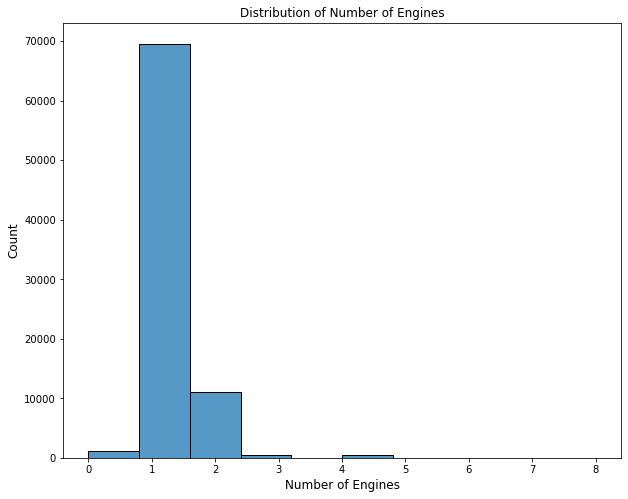

In [47]:
#visualise the histogram for Number of Engines
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Number_of_Engines, bins=10)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Engines', fontsize=12)
plt.show()

##### Observation

The histogram plot shows a right skewed plot hence to impute the values of the Number of Engines we can use the median. 

In [48]:
#imputing the Number of Engines using the median and filling up the missing values using fillna

aviation_df1['Number_of_Engines'].fillna((aviation_df1['Number_of_Engines'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

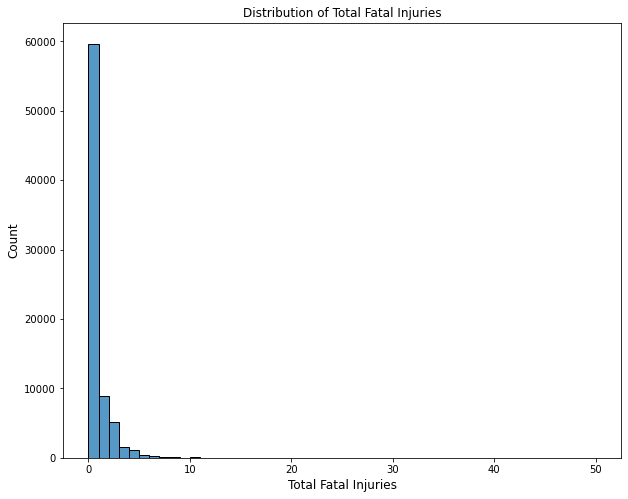

In [49]:
#visualise the histogram for Total Fatal Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Fatal_Injuries, bins=50, binrange=(0,50))
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Fatal Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total fatal injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [50]:
#imputing the Total Fatal Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Fatal_Injuries'].fillna((aviation_df1['Total_Fatal_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

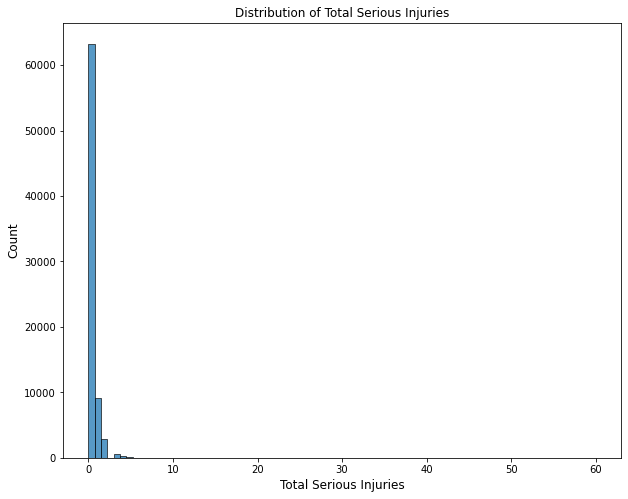

In [51]:
#visualise the histogram for Total Serious Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Serious_Injuries, bins=80, binrange=(0,60))
plt.xlabel('Total Serious Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Serious Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [52]:
#imputing the Total Serious Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Serious_Injuries'].fillna((aviation_df1['Total_Serious_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

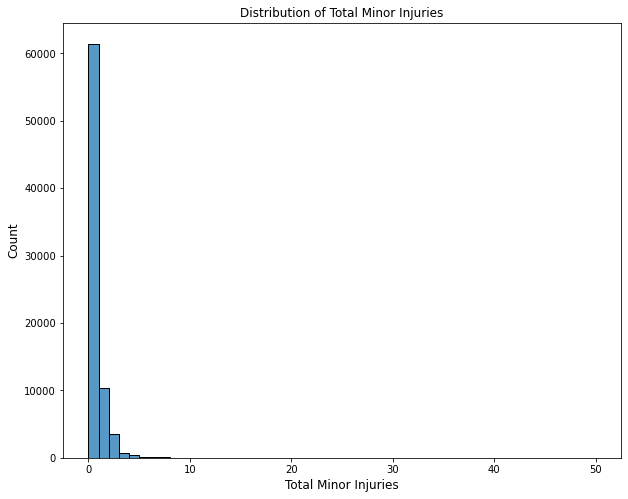

In [53]:
#visualise the histogram for Total Minor Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Minor_Injuries, bins=50, binrange=(0,50))
plt.xlabel('Total Minor Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Minor Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [54]:
#imputing the Total Minor Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Minor_Injuries'].fillna((aviation_df1['Total_Minor_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

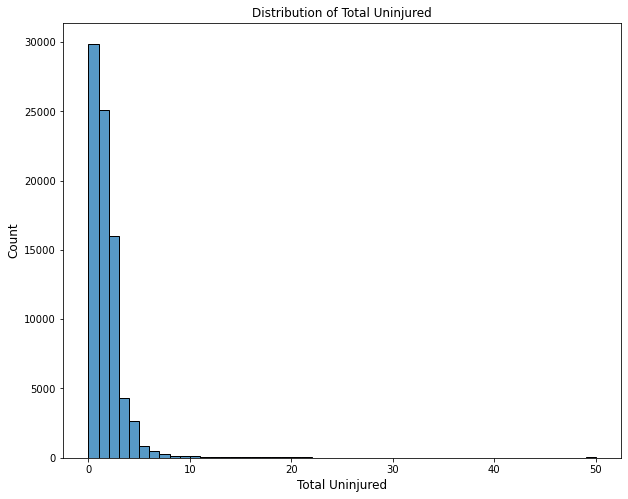

In [55]:
#visualise the histogram for Total Uninjured
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Uninjured, bins=50, binrange=(0,50))
plt.xlabel('Total Uninjured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Uninjured', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [56]:
#imputing the Total Uninjured using the median and filling up the missing values using fillna

aviation_df1['Total_Uninjured'].fillna((aviation_df1['Total_Uninjured'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for categorical variables

Given the high number of missing values for the categorical variables, there will be a need to drop some of the columns which may not be key for our analysis. For those that are key, then we may need to either impute using domain knowledge or with the mode or introduce a new variable "Unknown" for the null/missing values. 

In [57]:
#checking the statistical summary of categorical variables

aviation_df1.describe(include='O').T

,count,unique,top,freq
Event_Id,88889,87951,20001214X45071,3
Investigation_Type,88889,2,Accident,85015
Accident_Number,88889,88863,WPR22LA201,2
Location,88837,21977,"ANCHORAGE, AK",548
Country,88663,200,United States,82249
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport_Code,50249,10375,NONE,1488
Airport_Name,52790,24871,Private,240
Injury_Severity,87889,5,Fatal,85183


In [58]:
#checking null values in the Location variable
aviation_df1['Location'].isna().sum()

52

In [59]:
#percentage of null values in Location
percentage = (aviation_df1['Location'].isna().sum())/(aviation_df.shape[0]) * 100

print(f'The percentage of Location null values is {percentage}%')

The percentage of Location null values is 0.05849992687509141%


##### Observation
The best option would be dropping the rows with null values or imputing with 'Unknown'  given they are few (52 out of 88889 rows) and it is not prudent to impute the location of an accident using the mode as this would skew the data.

In [60]:
#imputing Location null values with "unknown"
aviation_df1['Location'].fillna('Unknown', inplace=True)

#checking value counts for Location
aviation_df1['Location'].value_counts().head(20)

ANCHORAGE, AK      548
MIAMI, FL          275
HOUSTON, TX        271
ALBUQUERQUE, NM    265
CHICAGO, IL        256
FAIRBANKS, AK      246
PHOENIX, AZ        224
TUCSON, AZ         196
DENVER, CO         196
ATLANTA, GA        189
RENO, NV           177
SAN DIEGO, CA      177
LAS VEGAS, NV      175
TALKEETNA, AK      171
ORLANDO, FL        163
PALMER, AK         163
ENGLEWOOD, CO      159
SAN ANTONIO, TX    151
MESA, AZ           149
CHANDLER, AZ       148
Name: Location, dtype: int64

In [61]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [62]:
#checking the number of null values of Country
aviation_df1['Country'].isnull().sum()

226

##### Observation

Given the Country Variable is important for our analysis given the Company aims to operate the planes in the United States of America, we note that it has 226 null values. We also note that if the null values have location and the location is in the United States of America, we can impute the country using the location using the US State Codes CSV.

In [63]:
#converting the USStateCodes_df column with the abbreviations into a list
us_state_codes = USStateCodes_df['Abbreviation'].str.upper().tolist()
us_state_codes

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY',
 'AS',
 'GU',
 'MH',
 'FM',
 'MP',
 'PW',
 'PR',
 'VI',
 'DC',
 'GM',
 'AO',
 'PO']

In [64]:
#defining a function to infer country from location

def infer_country(df):
    if pd.isnull(df['Country']) and isinstance(df['Location'], str):
        for state in us_state_codes:
            if  df['Location'].strip()[-2:] == state:
                return 'United States'
    return df['Country']

#apply the function to impute the values              
aviation_df1['Country'] = aviation_df1.apply(infer_country, axis=1)

#view the remaining null values
print("Remaining nulls in 'Country':", aviation_df1['Country'].isna().sum())

Remaining nulls in 'Country': 169


##### Observation

We still have null values and therefore we can use the Registration Numbers to impute the Country further using domain knowledge.

In [65]:
#we can create the registration prefix dictionary map

reg_prefix_map = {
    'N': 'United States',
    'USAF': 'United States',
    'USN': 'United States',
    'C-': 'Canada',
    'G-': 'United Kingdom',
    'VH-': 'Australia',
    'ZK-': 'New Zealand',
    'F-': 'France',
    'D-': 'Germany',
    'EC-': 'Spain',
    'I-': 'Italy',
    'JA': 'Japan',
    'HS-': 'Thailand',
    'B-': 'China',
    'PR-': 'Brazil'
}

#defining the function for infering the country
def infer_country_reg(df):
    if pd.isnull(df['Country']) and isinstance(df.get('Registration_Number'), str):
        reg = df['Registration_Number'].upper().strip()
        for prefix, country in reg_prefix_map.items():
            if reg.startswith(prefix):
                return country
    return df['Country']

#applying the function
aviation_df1['Country'] = aviation_df1.apply(infer_country_reg, axis=1)

#view the remaining null values
print("Remaining nulls in 'Country':", aviation_df1['Country'].isna().sum())

Remaining nulls in 'Country': 8


In [66]:
#impute the remaining missing values in Country with the value of the highest mode
aviation_df1['Country'] = aviation_df1['Country'].fillna(aviation_df1['Country'].mode()[0])

#check for missing values
aviation_df1['Country'].isna().sum()

0

In [67]:
aviation_df1['Amateur_Built'].value_counts()

No     80312
Yes     8475
Name: Amateur_Built, dtype: int64

##### Observation

As we can see, the type of build of the aircraft will influence the choice of Aircraft hence this variable is key in our analysis to see which aircraft is safer based on its build. The variable has 100 null values hence we can choose to drop the rows with null values or impute it with an 'Unknown' or use domain knowledge. In this case, we will fill the missing values with 'Unknown'.

In [68]:
aviation_df1['Amateur_Built'].fillna('Unknown', inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [69]:
aviation_df1['Weather_Condition'].isnull().sum()

4492

##### Observation

Given the Weather Condition may influence the aircraft accidents, this is a key parameter for our analysis and hence there is a need to deal with the missing data. Given the relationship between the broad phase of flight and weather where take off and landing correlates with VMC and Enroute phases can occur in IMC. 

In [70]:
#creating a mapping dictionary of the grouping of the phase of flight with the weather condition
weather_by_phase = (
    aviation_df1[aviation_df1['Weather_Condition'].notna()] #checks for rows where the weather condition does not have null values
    .groupby('Broad_phase_of_flight')['Weather_Condition'] #groups them by the Broad Phase of Flight
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

#applying the dictionary to the dataframe

aviation_df1['Weather_Condition'] = aviation_df1.apply(
    lambda df: weather_by_phase.get(df['Broad_phase_of_flight'], df['Weather_Condition']) 
    if pd.isna(df['Weather_Condition']) else df['Weather_Condition'],
    axis=1
)

#checking the remaining null values
aviation_df1['Weather_Condition'].isna().sum()

4439

In [71]:
aviation_df1['Weather_Condition'].value_counts()

VMC        77356
IMC         5976
Unknown     1118
Name: Weather_Condition, dtype: int64

In [72]:
#fill the missing values for Weather Condition with "Unknown"

aviation_df1['Weather_Condition'].fillna('Unknown', inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [73]:
#checking the number of null values of Make
aviation_df1['Make'].isnull().sum()

63

##### Observation

Given the fact that the Make variable is important for our analysis as we plan to recommend the type of aircraft to be purchased, imputing it with the mode would skew the data and equally create an assumption that the missing data on the makes was from the most frequent Make. It would be prudent to either impute using domain knowledge or introduce an unknown make for analysis as opposed to dropping the rows. Given that the Aircraft Model often includes a recognizable prefix that matches a specific Make of an Aircraft, then we could impute the missing values of the Make using the Model column.

In [74]:
#we can infer the model from the make using a mapping dictionary of the model as the key and the make of the aircraft as the values
model_make_map = {
    'PA': 'PIPER',
    'P28': 'PIPER',
    'C172': 'CESSNA',
    '172': 'CESSNA',
    '182': 'CESSNA',
    'C-': 'CESSNA',
    '737': 'BOEING',
    '747': 'BOEING',
    '777': 'BOEING',
    'A320': 'AIRBUS',
    'A330': 'AIRBUS',
    'A340': 'AIRBUS',
    'A350': 'AIRBUS',
    'R22': 'ROBINSON',
    'R44': 'ROBINSON',
    'SR22': 'CIRRUS',
    'SR20': 'CIRRUS',
    'B206': 'BELL',
    '206': 'BELL',
    'MD-': 'MCDONNELL DOUGLAS',
    'DC-': 'DOUGLAS',
    'DA40': 'DIAMOND',
    'DA42': 'DIAMOND',
    'GULF': 'GULFSTREAM',
    'LEAR': 'LEARJET',
    'EMB': 'EMBRAER',
    'CL-': 'BOMBARDIER',
    'CRJ': 'BOMBARDIER'
}


In [75]:
#define an imputation function
def infer_make(df):
    if pd.isna(df['Make']) and isinstance(df.get('Model'), str):
        model = df['Model'].upper().strip()
        for prefix, make in model_make_map.items():
            if model.startswith(prefix):
                return make
    return df['Make']

#apply the function
aviation_df1['Make'] = aviation_df1.apply(infer_make, axis=1)

#checking the number of null values of Make
aviation_df1['Make'].isnull().sum()

61

In [76]:
#we can drop the rows with null values in the 'Make' column
aviation_df1.dropna(subset=['Make'],inplace=True)

print(aviation_df1.shape)

aviation_df1.isna().sum()

(88828, 32)


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category         56552
Registration_Number        1704
Make                          0
Model                        49
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [77]:
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27609
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [78]:
#checking number of null values for Aircraft Category
aviation_df1['Aircraft_Category'].isna().sum()

56552

##### Observation

We note that we have numerous null values. However, the type of aircraft involved in the accident is key for our analysis given the company is interested in purchasing and operating airplanes for commercial and private purposes only. We cannot use statistical imputation because this would introduce noise into our data frame. Using domain knowledge, we can be able to impute values using the known relationship between the Make of an Aircraft and the Category drawn from the FAA and NTSB.

In [79]:
#We create a mapping dictionary with the make of the aircraft as the key and the Aircraft Category as the Value
make_map = {
    "CESSNA": "Airplane",
    "PIPER": "Airplane",
    "BEECH": "Airplane",
    "MOONEY": "Airplane",
    "DIAMOND": "Airplane",
    "BOEING": "Airplane",
    "AIRBUS": "Airplane",
    "DOUGLAS": "Airplane",
    "BOMBARDIER": "Airplane",
    "EMBRAER": "Airplane",
    "GULFSTREAM": "Airplane",
    "LEARJET": "Airplane",
    "FAIRCHILD": "Airplane",
    "GRUMMAN": "Airplane",
    "HAWKER": "Airplane",
    "MCDONNELL DOUGLAS": "Airplane",
    "VANS": "Airplane",
    "SOCATA": "Airplane",
    "CIRRUS": "Airplane",
    "ROCKWELL": "Airplane",
    "RAYTHEON": "Airplane",
    "NORTH AMERICAN": "Airplane",
    "ROBINSON": "Helicopter",
    "BELL": "Helicopter",
    "SIKORSKY": "Helicopter",
    "HUGHES": "Helicopter",
    "ENSTROM": "Helicopter",
    "EUROCOPTER": "Helicopter",
    "AIRBUS HELICOPTERS": "Helicopter",
    "AGUSTA": "Helicopter",
    "MD HELICOPTERS": "Helicopter",
    "KAMAN": "Helicopter",
    "SCHWEIZER": "Glider",
    "GROB": "Glider",
    "DG FLUGZEUGBAU": "Glider",
    "SLET": "Glider",
    "ALEXANDER SCHLEICHER": "Glider",
    "SZD": "Glider",
    "CAMERON BALLOONS": "Balloon",
    "AEROSTAR": "Balloon",
    "LINSTRAND": "Balloon",
    "THUNDER & COLT": "Balloon",
    "AUTOGYRO": "Gyroplane",
    "MAGNI": "Gyroplane",
    "ELA": "Gyroplane",
    "QUICKSILVER": "Ultralight",
    "RANS": "Ultralight",
    "CHALLENGER": "Ultralight",
    "ZENITH": "Ultralight",
    "KITFOX": "Ultralight",
    "AERONCA": "Ultralight",
    "EXPERIMENTAL": "Ultralight",
}


In [80]:
# Fill missing values in Aircraft Category using Make
def infer_category(df):
    if pd.isna(df['Aircraft_Category']):
        return make_map.get(df['Make'])
    else:
        return df['Aircraft_Category']
    
#Apply the function to the dataframe
aviation_df1['Aircraft_Category'] = aviation_df1.apply(infer_category, axis=1)

#check the remaining null values
print('The remaining null values in Aircraft Category are:', aviation_df1['Aircraft_Category'].isna().sum())

#check the value counts of unique values
aviation_df1['Aircraft_Category'].value_counts()

The remaining null values in Aircraft Category are: 14280


Airplane             65121
Helicopter            7105
Glider                1056
Ultralight             486
Balloon                320
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [81]:
# Group by Model and see which Aircraft Category is most common
model_cat_map = aviation_df1[aviation_df1['Aircraft_Category'].notna()]\
                    .groupby('Model')['Aircraft_Category']\
                    .agg(lambda x: x.value_counts().idxmax()).to_dict()

# Group by Engine Type and Number of Engines and see which Aircraft Category is most common
engine_cat_map = aviation_df1[aviation_df1['Aircraft_Category'].notna()]\
                    .groupby(['Engine_Type', 'Number_of_Engines'])['Aircraft_Category']\
                    .agg(lambda x: x.value_counts().idxmax()).to_dict()

In [82]:
# Define a function to infer Aircraft Category using Model, Type of Engine and Number of Engines
def infer_aircraft_category(df):
    if pd.notna(df['Aircraft_Category']):
        return df['Aircraft_Category']
    
    if df['Model'] in model_cat_map:
        return model_cat_map[df['Model']]

    engine = (df['Engine_Type'], df['Number_of_Engines'])
    if engine in engine_cat_map:
        return engine_cat_map[engine]

# Apply the function to the dataframe
aviation_df1['Aircraft_Category'] = aviation_df1.apply(infer_aircraft_category, axis=1)

#check the remaining null values
print('The remaining null values in Aircraft Category are:', aviation_df1['Aircraft_Category'].isna().sum())

#check the value counts of unique values
aviation_df1['Aircraft_Category'].value_counts()

The remaining null values in Aircraft Category are: 136


Airplane             77461
Helicopter            8046
Glider                1566
Balloon                522
Ultralight             515
Gyrocraft              272
Weight-Shift           184
Powered Parachute       96
Unknown                 16
Blimp                    7
Powered-Lift             6
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [83]:
#We can replace the remaining null values with 'unknown'
aviation_df1['Aircraft_Category'].fillna('Unknown', inplace=True)

#checking for null values in the columns
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                        49
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [84]:
#checking for null values in the 'Model' column
aviation_df1['Model'].isna().sum()

49

##### Observation
As we can see, the information provided here is about the type of model of the aircraft. In this case, the type of model is a unique identifier of an aircraft and hence it would be best to impute null values by using rows with the same Make, Engine Type and Aircraft Category.

In [85]:
# Create a function to fill missing Model within the groups
def fill_model_with_mode(group):
    if group['Model'].isnull().all(): #checks that all the columns have null values
        return group
    mode = group['Model'].mode()
    if not mode.empty:
        group['Model'] = group['Model'].fillna(mode[0]) #fills with the highest occuring mode
    return group

# Apply the function to the group and reset the index
aviation_df1 = aviation_df1.groupby(['Make', 'Engine_Type', 'Aircraft_Category'], dropna=False).apply(fill_model_with_mode).reset_index(drop=True)

#check the null values in the Model variable
print('The remaining null values in Model are:', aviation_df1['Model'].isna().sum())

The remaining null values in Model are: 15


In [86]:
#fill the remaining null values with 'Unknown'
aviation_df1['Model'] = aviation_df1['Model'].fillna('Unknown')

#check for the missing values in the df
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [87]:
#checking number of null values for type of engine
aviation_df1['Engine_Type'].isna().sum()

7027

##### Observation

We can impute the null values using the relationship between the Aircraft Model and the type of engine.

In [88]:
#Generate the mapping
model_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby('Model')['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

#define a function for imputing the engine type
def impute_engine_type(df):
    if pd.notna(df['Engine_Type']):
        return df['Engine_Type']
    return model_engine_map.get(df['Model'])

#Apply the imputation function
aviation_df1['Engine_Type'] = aviation_df1.apply(impute_engine_type, axis=1)

#check the null values in the Engine Type variable
print('The remaining null values in Type of Engine are:', aviation_df1['Engine_Type'].isna().sum())

The remaining null values in Type of Engine are: 1085


In [89]:
#imputing using the make,number of engines and aircraft category
make_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby(['Make', 'Number_of_Engines'])['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

cat_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby('Aircraft_Category')['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

#define a function for imputing the engine type
def infer_type_engine(df):
    if pd.notna(df['Engine_Type']):
        return df['Engine_Type']
    
    make_key = (df['Make'], df['Number_of_Engines'])
    if make_key in make_engine_map:
        return make_engine_map[make_key]
    
    category = df['Aircraft_Category']
    if category in cat_engine_map:
        return cat_engine_map[category]
    
#Apply the imputation function
aviation_df1['Engine_Type'] = aviation_df1.apply(infer_type_engine, axis=1)

#check the null values in the Engine Type variable
print('The remaining null values in Type of Engine are:', aviation_df1['Engine_Type'].isna().sum())

The remaining null values in Type of Engine are: 0


In [90]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [91]:
#checking null values of Injury Severity
aviation_df1['Injury_Severity'].isna().sum()

983

In [92]:
aviation_df1['Injury_Severity'].value_counts()

Fatal          85142
Non-Fatal       2216
Minor            218
Serious          173
Unavailable       96
Name: Injury_Severity, dtype: int64

##### Observation

Given this is a key variable in our analysis and given that our analysis is meant to support investment and operational decisions for the Company, it would be best to introduce an "Unknown" or "Missing" Variable so as to preserve data integrity.

In [93]:
#fill the missing values with unknown
aviation_df1['Injury_Severity'].fillna('Unknown', inplace=True)

#check the null values in the Injury Severity variable
aviation_df1['Injury_Severity'].isna().sum()

0

In [94]:
#checking null values of Aircraft Damage
aviation_df1['Aircraft_damage'].isna().sum()

3177

In [95]:
#checking value_counts
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64125
Destroyed      18612
Minor           2795
Unknown          119
Name: Aircraft_damage, dtype: int64

##### Observation

Given this is a key variable in our analysis and given that our analysis is meant to support investment and operational decisions for the Company based on safety performance, it would be best to introduce an "Unknown" Variable so as to preserve data integrity.

In [96]:
aviation_df1['Aircraft_damage'].fillna('Unknown', inplace=True)

#checking value_counts
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64125
Destroyed      18612
Unknown         3296
Minor           2795
Name: Aircraft_damage, dtype: int64

In [97]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [98]:
aviation_df1['Registration_Number'].isna().sum()

1704

In [99]:
aviation_df1['Registration_Number'].value_counts()

UNREG      130
USAF         9
UNKNOWN      9
N20752       8
N53893       6
          ... 
N83516       1
VQ-BJP       1
N533BK       1
N5321P       1
PT-AFN       1
Name: Registration_Number, Length: 79071, dtype: int64

In [100]:
aviation_df1['Purpose_of_flight'].isna().sum()

6151

In [101]:
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49436
Instructional                10601
Unknown                       6806
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/Corporate            553
Flight Test                    404
Skydiving                      182
Air Race/Show                  158
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Public Aircraft - Local         74
Public Aircraft - State         64
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Name: Purpose_of_flight, dtype: int64

In [102]:
aviation_df1['Broad_phase_of_flight'].isna().sum()

27115

In [103]:
aviation_df1['Broad_phase_of_flight'].value_counts()

Landing        15427
Takeoff        12490
Cruise         10267
Maneuvering     8143
Approach        6543
Climb           2034
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad_phase_of_flight, dtype: int64

##### Observation

Due to the nature of the data, we will leave the null values in the Injury Severity, Registration Numbers, Purpose of Flight and Broad Phase of Flight for now.

#### Assumption for dropping columns

For any columns which are not key for our analysis with the percentage of null values exceeding 50%, they shall be dropped from the dataframe. This is because we introduce a high percentage of bias and noise in our analysis when we impute these null values in the variables with a placeholder or the mode of the variable if we lack any domain knowledge on how to impute them. Dropping the rows will also reduce the accuracy of our analysis. 

In [104]:
# Count the number of missing values in each column
aviation_df1.isna().sum()


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [105]:
# Find the fifty percent threshold
threshold = len(aviation_df1) * 0.5
threshold

44414.0

In [106]:
# Create a filter
cols_to_drop = aviation_df1.columns[aviation_df1.isna().sum() >= threshold]
cols_to_drop 

Index(['Latitude', 'Longitude', 'FAR_Description', 'Schedule', 'Air_carrier'], dtype='object')

In [107]:
# Drop columns with values above the threshold and saving it to a new df
aviation_df2 = aviation_df1.drop(columns=cols_to_drop)

aviation_df2.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Airport_Code              38593
Airport_Name              36053
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6151
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Year                    0
dtype: int64

##### Observation

We also note that we will not utilise the Report Status, Airport Code, Airport Name and Publication Date in our analysis hence we can drop these columns too.

In [108]:
# Drop columns which we will not use in our analysis
aviation_df2.drop(columns=['Report_Status', 'Airport_Code', 'Airport_Name', 'Publication_Date'], inplace=True)

aviation_df2.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6151
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Event_Year                    0
dtype: int64

#### 3.1.5 Checking for duplicates

In [109]:
aviation_df2.duplicated().sum()

0

##### Observation

We note that there are no duplicated rows hence we can proceed to check on outliers.

#### 3.1.7 Checking for outliers

It is key to check for outliers in the numerical columns. However, it is key to note that the aviation domain naturally includes rare but high fatality incidents. It is therefore important to distinguish between:
- Valid outliers (e.g commercial airline crash with many fatalities)
- Potential data entry errors (e.g unrealistic values)

We shall retain valid outliers to preserve the integrity of the historical record while statistical summaries will be supported with median values to reduce distortion.

In [110]:
#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88828.0,1.136635,0.432669,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88828.0,0.564495,5.127821,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88828.0,0.240386,1.434605,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88828.0,0.309216,2.084289,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88828.0,5.032118,26.984481,0.0,0.0,1.0,2.0,699.0
Event_Year,88828.0,1999.201885,11.888610,1948.0,1989.0,1998.0,2009.0,2022.0


##### Observation

From this statistical summary we note that the maximum values are feasible values. However, we note the entry of 699 for total uninjured which may be a potential data entry error given that a commercial aircraft like the Airbus A380 has a typical seating of 525 passengers. Based on this, we can check on this row and use domain knowledge to correct it.

In [111]:
selected_row = aviation_df2[aviation_df2['Total_Uninjured'] == 699.0]
selected_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
46277,20001212X19017,Accident,LAX99FA218B,1999-06-06,"LOS ANGELES, CA",United States,Fatal,Substantial,Airplane,F-GTOM,...,4.0,Turbo Fan,Unknown,0.0,0.0,0.0,699.0,VMC,Standing,1999
46286,20001212X19017,Accident,LAX99FA218A,1999-06-06,"LOS ANGELES, CA",United States,Fatal,Minor,Airplane,N751PR,...,4.0,Turbo Fan,Unknown,0.0,0.0,0.0,699.0,VMC,Taxi,1999


##### Observation

While checking on accident records for the accident drawn from this website, https://asn.flightsafety.org/wikibase/423041between, we note that the F-GTOM had 274 uninjured passengers and N751PR had 425 uninjured passengers. In view of this, we can correct this in our dataframe.

In [112]:
#correcting the values
aviation_df2.loc[46277,'Total_Uninjured']= 274
aviation_df2.loc[46286,'Total_Uninjured'] = 425

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88828.0,1.136635,0.432669,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88828.0,0.564495,5.127821,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88828.0,0.240386,1.434605,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88828.0,0.309216,2.084289,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88828.0,5.024249,26.835030,0.0,0.0,1.0,2.0,588.0
Event_Year,88828.0,1999.201885,11.888610,1948.0,1989.0,1998.0,2009.0,2022.0


##### Observation
We note the maximum value of 588 for total uninjured which may be a potential data entry error given that a commercial aircraft like the Airbus A380 has a typical seating of 525 passengers. Based on this, we can check on this row and use domain knowledge to correct it.

In [113]:
select_row= aviation_df2[aviation_df2['Total_Uninjured'] == 588.0]
select_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
4143,20001214X42478,Incident,LAX83IA149B,1983-03-18,"LOS ANGELES, CA",United States,Non-Fatal,Minor,Airplane,N323EA,...,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,588.0,VMC,Standing,1983
4144,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,Non-Fatal,Minor,Airplane,9VSQQ,...,4.0,Turbo Fan,NaN,0.0,0.0,0.0,588.0,VMC,Taxi,1983


##### Observation

While checking on accident records for the accident drawn from the NTSB report, we note that the N323EA had 213 uninjured passengers and 9VSQQ had 375 uninjured passengers. In view of this, we can correct this in our dataframe.

In [114]:
#correcting the values
aviation_df2.loc[4143,'Total_Uninjured']= 213
aviation_df2.loc[4144,'Total_Uninjured'] = 375

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88828.0,1.136635,0.432669,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88828.0,0.564495,5.127821,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88828.0,0.240386,1.434605,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88828.0,0.309216,2.084289,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88828.0,5.017630,26.730030,0.0,0.0,1.0,2.0,576.0
Event_Year,88828.0,1999.201885,11.888610,1948.0,1989.0,1998.0,2009.0,2022.0


##### Observation
We note the maximum value of 576 for total uninjured which may be a potential data entry error given that a commercial aircraft like the Airbus A380 has a typical seating of 525 passengers. Based on this, we can check on this row and use domain knowledge to correct it.

In [115]:
check_row= aviation_df2[aviation_df2['Total_Uninjured'] == 576.0]
check_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
69771,20110412X23201,Accident,DCA11LA045,2011-04-12,"JAMAICA, NY",United States,Fatal,Substantial,Airplane,F-HPJD,...,4.0,Turbo Fan,NaN,0.0,0.0,0.0,576.0,VMC,NaN,2011


##### Observation

While checking on accident records for the accident drawn from the NTSB report, we note that the F-HPJD had 510 uninjured passengers. In view of this, we can correct this in our dataframe.

In [116]:
#correcting the values
aviation_df2.loc[69771,'Total_Uninjured']= 510
aviation_df2.loc[69771,'Broad_phase_of_flight'] = 'Taxi'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88828.0,1.136635,0.432669,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88828.0,0.564495,5.127821,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88828.0,0.240386,1.434605,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88828.0,0.309216,2.084289,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88828.0,5.016887,26.715072,0.0,0.0,1.0,2.0,573.0
Event_Year,88828.0,1999.201885,11.888610,1948.0,1989.0,1998.0,2009.0,2022.0


##### Observation
We note the maximum value of 573 for total uninjured which may be a potential data entry error given that a commercial aircraft like the Airbus A380 has a typical seating of 525 passengers. Based on this, we can check on this row and use domain knowledge to correct it.

In [117]:
check2_row= aviation_df2[aviation_df2['Total_Uninjured'] == 573.0]
check2_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
41766,20001208X07896,Accident,DCA97WA047A,1997-05-14,"LONDON, UNITED KINGDOM",United Kingdom,Fatal,Minor,Airplane,NaN,...,4.0,Turbo Fan,Unknown,0.0,0.0,0.0,573.0,VMC,NaN,1997
41767,20001208X07896,Accident,DCA97WA047B,1997-05-14,"LONDON, UNITED KINGDOM",United Kingdom,Fatal,Substantial,Airplane,N770UA,...,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,573.0,VMC,NaN,1997


In [118]:
#correcting the values
aviation_df2.loc[41766,'Total_Uninjured'] = 292
aviation_df2.loc[41766,'Registration_Number'] = 'C-GAGM'
aviation_df2.loc[41767,'Total_Uninjured']= 281
aviation_df2.loc[41767,'Broad_phase_of_flight'] = 'Taxi'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88828.0,1.136635,0.432669,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88828.0,0.564495,5.127821,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88828.0,0.240386,1.434605,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88828.0,0.309216,2.084289,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88828.0,5.010436,26.612328,0.0,0.0,1.0,2.0,558.0
Event_Year,88828.0,1999.201885,11.888610,1948.0,1989.0,1998.0,2009.0,2022.0


In [119]:
check3_row= aviation_df2[aviation_df2['Total_Uninjured'] == 558.0]
check3_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
57386,20040908X01362,Accident,DCA04WA078,2004-08-31,"HANAMAKI, JAPAN",Japan,Fatal,Unknown,Airplane,NaN,...,1.0,Turbo Fan,NaN,0.0,1.0,1.0,558.0,Unknown,NaN,2004


##### Observation

Since we lack a unique identifier, we can drop this row.

In [120]:
aviation_df2.drop(index=[57386],inplace=True)

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88827.0,1.136636,0.432672,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88827.0,0.564502,5.127849,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88827.0,0.240377,1.434611,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88827.0,0.309208,2.084300,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88827.0,5.004210,26.547717,0.0,0.0,1.0,2.0,528.0
Event_Year,88827.0,1999.201831,11.888666,1948.0,1989.0,1998.0,2009.0,2022.0


In [121]:
check4_row= aviation_df2[aviation_df2['Total_Uninjured'] == 528.0]
check4_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
18358,20001213X31904,Incident,NYC87IA227B,1987-08-09,"NEW YORK, NY",United States,Non-Fatal,Unknown,Airplane,N558PE,...,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,528.0,VMC,Approach,1987
18359,20001213X31904,Incident,NYC87IA227A,1987-08-09,"NEW YORK, NY",United States,Non-Fatal,Unknown,Airplane,N93109,...,4.0,Turbo Fan,Unknown,0.0,0.0,0.0,528.0,VMC,Approach,1987


##### Observation

Using domain knowledge, we note that there were no planes that had a passenger capacity of 528 in 1987 hence this information may be incorrect because the Airbus 380 was launched in 2007. We also note that the airplane registration numbers are not found in the NTSB website. Given it is an outlier that would skew our analysis, we therefore drop these rows.

In [122]:
aviation_df2.drop(index=[18358,18359],inplace=True)

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88825.0,1.136583,0.432525,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88825.0,0.564514,5.127906,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,88825.0,0.240383,1.434626,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88825.0,0.309215,2.084323,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88825.0,4.992435,26.431765,0.0,0.0,1.0,2.0,521.0
Event_Year,88825.0,1999.202105,11.888658,1948.0,1989.0,1998.0,2009.0,2022.0


In [123]:
check5_row= aviation_df2[aviation_df2['Total_Uninjured'] == 521.0]
check5_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
80650,20170930X94216,Accident,ENG17RA039,2017-09-30,"GOOSE BAY, CANADA",Canada,Fatal,Minor,Airplane,F-HPJE,...,1.0,Turbo Fan,NaN,0.0,0.0,0.0,521.0,Unknown,NaN,2017


##### Observation

The aircraft information from this website https://avherald.com/h?article=4af15205 corresponds with the information in our dataframe hence we can confirm that we have removed outliers in the total_uninjured column.

In [124]:
check5_row= aviation_df2[aviation_df2['Total_Fatal_Injuries'] == 349.0]
check5_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
40874,20020124X00116,Accident,DCA97WA007B,1996-11-12,"NEW DELHI, INDIA",India,Fatal,Unknown,Unknown,NaN,...,1.0,Unknown,NaN,349.0,0.0,0.0,1.0,Unknown,NaN,1996
40875,20020124X00116,Accident,DCA97WA007A,1996-11-12,"NEW DELHI, INDIA",India,Fatal,Unknown,Airplane,NaN,...,1.0,Turbo Fan,NaN,349.0,0.0,0.0,1.0,Unknown,NaN,1996


In [125]:
#correcting the values
aviation_df2.loc[40874,'Total_Fatal_Injuries'] = 37
aviation_df2.loc[40874,'Registration_Number'] = 'UN-76435'
aviation_df2.loc[40874,'Weather_Condition']='IMC'
aviation_df2.loc[40874,'Broad_phase_of_flight'] = 'Cruise'
aviation_df2.loc[40874,'Aircraft_Category'] = 'Airplane'
aviation_df2.loc[40874,'Aircraft_damage'] = 'Destroyed'
aviation_df2.loc[40874,'Number_of_Engines'] = 4
aviation_df2.loc[40874,'Engine_Type'] = 'Turbo Fan'
aviation_df2.loc[40875,'Make'] = 'ILYUSHIN'
aviation_df2.loc[40875,'Model'] = 'II-76'


aviation_df2.loc[40875,'Total_Fatal_Injuries']= 312
aviation_df2.loc[40875,'Registration_Number'] = 'HZ-AIH'
aviation_df2.loc[40875,'Broad_phase_of_flight'] = 'Cruise'
aviation_df2.loc[40875,'Weather_Condition']='IMC'
aviation_df2.loc[40875,'Aircraft_damage'] = 'Destroyed'
aviation_df2.loc[40875,'Number_of_Engines'] = 4
aviation_df2.loc[40875,'Make'] = 'BOEING'
aviation_df2.loc[40875,'Model'] = '747-100'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88825.0,1.136651,0.432737,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88825.0,0.560585,4.966755,0.0,0.0,0.0,0.0,312.0
Total_Serious_Injuries,88825.0,0.240383,1.434626,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88825.0,0.309215,2.084323,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,88825.0,4.992435,26.431765,0.0,0.0,1.0,2.0,521.0
Event_Year,88825.0,1999.202105,11.888658,1948.0,1989.0,1998.0,2009.0,2022.0


#### Observation
The information provided is accurate hence this is a valid outlier for the Total Fatal Injuries.

In [126]:
check6_row= aviation_df2[aviation_df2['Total_Minor_Injuries'] == 380.0]
check6_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
48920,20001212X21426,Incident,DCA00WA074,2000-07-23,"MONTREAL, CANADA",Canada,Non-Fatal,Minor,Airplane,NaN,...,1.0,Unknown,Unknown,0.0,0.0,380.0,1.0,IMC,NaN,2000


In [127]:
aviation_df2.loc[48920,'Total_Minor_Injuries'] = 0
aviation_df2.loc[48920,'Total_Uninjured'] = 380
aviation_df2.loc[48920,'Broad_phase_of_flight'] = 'Landing'
aviation_df2.loc[48920,'Registration_Number'] = 'CN-RME'
aviation_df2.loc[48920,'Number_of_Engines'] = 4
aviation_df2.loc[48920,'Engine_Type'] = 'Turbo Fan'
aviation_df2.loc[48920,'Make'] = 'BOEING'
aviation_df2.loc[48920,'Model'] = '747-200'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88825.0,1.136684,0.432844,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88825.0,0.560585,4.966755,0.0,0.0,0.0,0.0,312.0
Total_Serious_Injuries,88825.0,0.240383,1.434626,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88825.0,0.304937,1.649649,0.0,0.0,0.0,0.0,200.0
Total_Uninjured,88825.0,4.996701,26.461694,0.0,0.0,1.0,2.0,521.0
Event_Year,88825.0,1999.202105,11.888658,1948.0,1989.0,1998.0,2009.0,2022.0


In [128]:
aviation_df2.loc[(aviation_df2['Make'] == 'BOEING') & (aviation_df2['Model'].str.startswith('747')),'Number_of_Engines'] = 4
aviation_df2.loc[(aviation_df2['Make'] == 'AIRBUS') & (aviation_df2['Model'].str.startswith('A380,A340')),'Number_of_Engines'] = 4

In [129]:
check7_row= aviation_df2[aviation_df2['Total_Minor_Injuries'] == 200.0]
check7_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
46937,20001212X19469,Accident,DCA99RA073,1999-08-23,"HONG KONG, CHINA",China,Fatal,Destroyed,Airplane,NaN,...,1.0,Unknown,Unknown,0.0,0.0,200.0,117.0,Unknown,NaN,1999


##### Observation

From domain knowledge, we can update some of these fields.


In [130]:
#filling in unknown variables from the NTSB Report
aviation_df2.loc[46937,'Total_Fatal_Injuries'] = 3
aviation_df2.loc[46937,'Total_Serious_Injuries'] = 50
aviation_df2.loc[46937,'Total_Minor_Injuries'] = 153
aviation_df2.loc[46937,'Total_Uninjured'] = 109
aviation_df2.loc[46937,'Broad_phase_of_flight'] = 'Landing'
aviation_df2.loc[46937,'Registration_Number'] = 'B-150'
aviation_df2.loc[46937,'Number_of_Engines'] = 3
aviation_df2.loc[46937,'Engine_Type'] = 'Turbo Fan'
aviation_df2.loc[46937,'Make'] = 'MCDONNELL DOUGLAS'
aviation_df2.loc[46937,'Model'] = 'MD-11'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88825.0,1.140287,0.443702,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88825.0,0.560619,4.966761,0.0,0.0,0.0,0.0,312.0
Total_Serious_Injuries,88825.0,0.240946,1.444309,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88825.0,0.304408,1.592130,0.0,0.0,0.0,0.0,171.0
Total_Uninjured,88825.0,4.996611,26.461327,0.0,0.0,1.0,2.0,521.0
Event_Year,88825.0,1999.202105,11.888658,1948.0,1989.0,1998.0,2009.0,2022.0


In [131]:
check8_row= aviation_df2[aviation_df2['Total_Minor_Injuries'] == 171.0]
check8_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
43211,20001208X09291,Accident,DCA98MA015,1997-12-28,PACIFIC OCEAN,Region - Pacific Ocean,Fatal,Minor,Airplane,N4723U,...,4.0,Unknown,Unknown,1.0,18.0,171.0,203.0,VMC,Cruise,1997


##### Observation

The information provided is accurate hence this is a valid outlier for the Total Minor Injuries.

In [132]:
#filling in unknown engine type
aviation_df2.loc[43211,'Engine_Type'] = 'Turbo Fan'

In [133]:
check9_row= aviation_df2[aviation_df2['Total_Serious_Injuries'] == 161.0]
check9_row

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year
84395,20200205X32547,Accident,DCA20RA069,2020-02-05,"ISTANBUL, TURKEY",Turkey,Fatal,Substantial,Airplane,TC-IZK,...,1.0,Turbo Fan,NaN,3.0,161.0,19.0,0.0,Unknown,NaN,2020


##### Observation

The information provided is accurate hence this is a valid outlier for the Total Minor Injuries.

In [134]:
#filling in unknown broad phase of flight and weather condition
aviation_df2.loc[84395,'Broad_phase_of_flight'] = 'Landing'
aviation_df2.loc[84395,'Weather_Condition']='IMC'

#checking the statistical summary of the dataframe
aviation_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,88825.0,1.140287,0.443702,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,88825.0,0.560619,4.966761,0.0,0.0,0.0,0.0,312.0
Total_Serious_Injuries,88825.0,0.240946,1.444309,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,88825.0,0.304408,1.592130,0.0,0.0,0.0,0.0,171.0
Total_Uninjured,88825.0,4.996611,26.461327,0.0,0.0,1.0,2.0,521.0
Event_Year,88825.0,1999.202105,11.888658,1948.0,1989.0,1998.0,2009.0,2022.0


#### 3.1.6 Feature Engineering

We can create new numerical columns that can aid further in our analysis after completing cleaning of our dataframe.

In [135]:
#creating a list of columns to sum
cols_to_sum = ['Total_Fatal_Injuries','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']

#creating a column of total passengers aboard by summing data on injuries
aviation_df2['Total_Aboard'] = aviation_df2[cols_to_sum].sum(axis=1)

#previewing the first 5 columns
aviation_df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year,Total_Aboard
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,NC6404,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,Cruise,1948,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,Unknown,1962,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,N5142R,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,1974,4.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",United States,Fatal,Destroyed,Airplane,N15NY,...,Turbo Fan,Personal,1.0,2.0,0.0,0.0,VMC,Approach,1979,3.0


In [136]:
#creating a column of fatality rate which only gets values when Total Aboard is greater than 0
aviation_df2['Fatality_Rate'] = aviation_df2. apply(
    lambda x: x['Total_Fatal_Injuries'] / x['Total_Aboard'] 
    if x ['Total_Aboard'] > 0 else 'None',
    axis=1
)

#previewing the first 5 columns
aviation_df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year,Total_Aboard,Fatality_Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,NC6404,...,Personal,2.0,0.0,0.0,0.0,Unknown,Cruise,1948,2.0,1
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,N5069P,...,Personal,4.0,0.0,0.0,0.0,Unknown,Unknown,1962,4.0,1
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,N5142R,...,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,1974,4.0,0.75
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977,2.0,1
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",United States,Fatal,Destroyed,Airplane,N15NY,...,Personal,1.0,2.0,0.0,0.0,VMC,Approach,1979,3.0,0.333333


In [137]:
# Returns whether an accident is fatal or not by the fact it had fatal injuries or not
aviation_df2['Fatal_Accident'] = aviation_df2['Total_Fatal_Injuries'].fillna(0) > 0

#previewing the first 5 columns
aviation_df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year,Total_Aboard,Fatality_Rate,Fatal_Accident
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,NC6404,...,2.0,0.0,0.0,0.0,Unknown,Cruise,1948,2.0,1,True
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,N5069P,...,4.0,0.0,0.0,0.0,Unknown,Unknown,1962,4.0,1,True
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,N5142R,...,3.0,0.0,0.0,1.0,IMC,Cruise,1974,4.0,0.75,True
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,1977,2.0,1,True
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",United States,Fatal,Destroyed,Airplane,N15NY,...,1.0,2.0,0.0,0.0,VMC,Approach,1979,3.0,0.333333,True


In [138]:
aviation_df2.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1698
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6150
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27107
Event_Year                    0
Total_Aboard                  0
Fatality_Rate                 0
Fatal_Accident                0
dtype: int64

#### 3.1.7 Saving the clean dataset

In [139]:
aviation_df2.to_csv('Cleaned_Aviation_Data.csv', index=False)

### 3.2 Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of investigating a dataset to discover trends, patterns, anomalies and relationships between variables to support business recommendations.

The goal of this Exploratory Data Analysis is to:
- Identify trends in aviation accidents over time
- Understand which aircraft models and types are most or least risky
- Analyse severity patterns and contributing conditions
- Support data driven recommendations for safe aircraft investment




In [140]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the clean dataset and create a dataframe

df = pd.read_csv('Data/Cleaned_Aviation_Data.csv')

df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Event_Year,Total_Aboard,Fatality_Rate,Fatal_Accident
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,NC6404,...,2.0,0.0,0.0,0.0,Unknown,Cruise,1948,2.0,1.0,True
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,N5069P,...,4.0,0.0,0.0,0.0,Unknown,Unknown,1962,4.0,1.0,True
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,N5142R,...,3.0,0.0,0.0,1.0,IMC,Cruise,1974,4.0,0.75,True
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,1977,2.0,1.0,True
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",United States,Fatal,Destroyed,Airplane,N15NY,...,1.0,2.0,0.0,0.0,VMC,Approach,1979,3.0,0.3333333333333333,True


In [141]:
df.shape

(88825, 26)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88825 entries, 0 to 88824
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88825 non-null  object 
 1   Investigation_Type      88825 non-null  object 
 2   Accident_Number         88825 non-null  object 
 3   Event_Date              88825 non-null  object 
 4   Location                88825 non-null  object 
 5   Country                 88825 non-null  object 
 6   Injury_Severity         88825 non-null  object 
 7   Aircraft_damage         88825 non-null  object 
 8   Aircraft_Category       88825 non-null  object 
 9   Registration_Number     87127 non-null  object 
 10  Make                    88824 non-null  object 
 11  Model                   88825 non-null  object 
 12  Amateur_Built           88825 non-null  object 
 13  Number_of_Engines       88825 non-null  float64
 14  Engine_Type             88825 non-null

In [143]:
df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Injury_Severity               0
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1698
Make                          1
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6150
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27107
Event_Year                    0
Total_Aboard                  0
Fatality_Rate                 0
Fatal_Accident                0
dtype: int64

#### 3.2.1 Univariate Analysis

Univariate analysis is the process of analysing one variable at a time so as to understand its distribution, frequency and spread. 

The goal is to explore the shape and characteristics of each important column in our dataset to detect patterns, anomalies or data quality issues.

##### 3.2.1.1 Numerical Columns

We will explore the shape and characteristics of the following numerical columns:

* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured
* Total Aboard
* Number of Engines
* Year

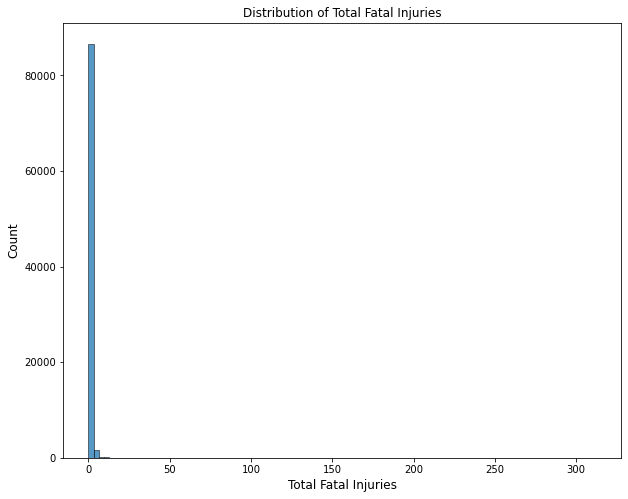

In [144]:
#plotting histogram of Total Fatal Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Total_Fatal_Injuries, bins=100)
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Fatal Injuries', fontsize=12)
plt.show()

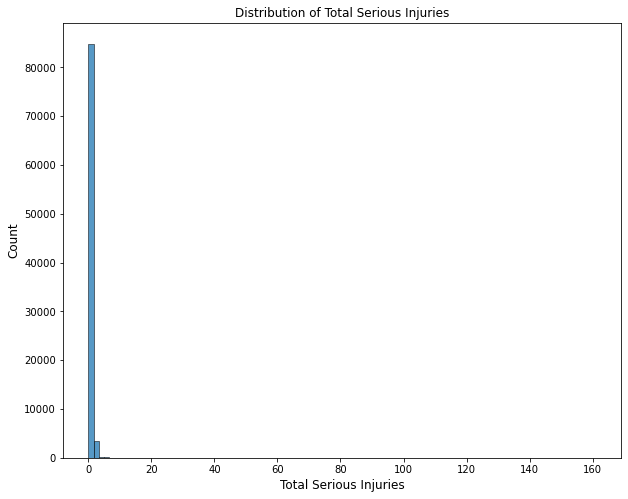

In [145]:
#plotting histogram of Total Serious Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Total_Serious_Injuries, bins=100)
plt.xlabel('Total Serious Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Serious Injuries', fontsize=12)
plt.show()

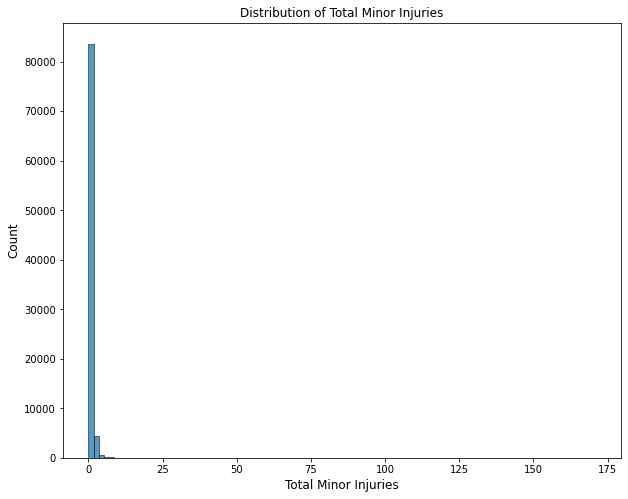

In [146]:
#plotting histogram of Total Minor Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Total_Minor_Injuries,bins=100)
plt.xlabel('Total Minor Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Minor Injuries', fontsize=12)
plt.show()

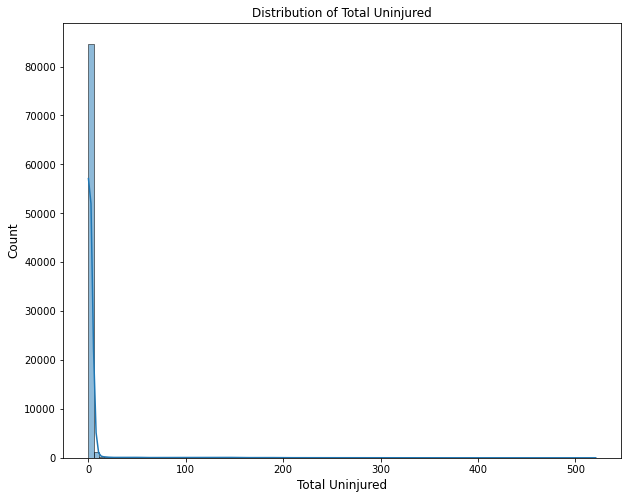

In [147]:
#plotting histogram of Total Uninjured
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Total_Uninjured, bins=100, kde=True)
plt.xlabel('Total Uninjured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Uninjured', fontsize=12)
plt.show()

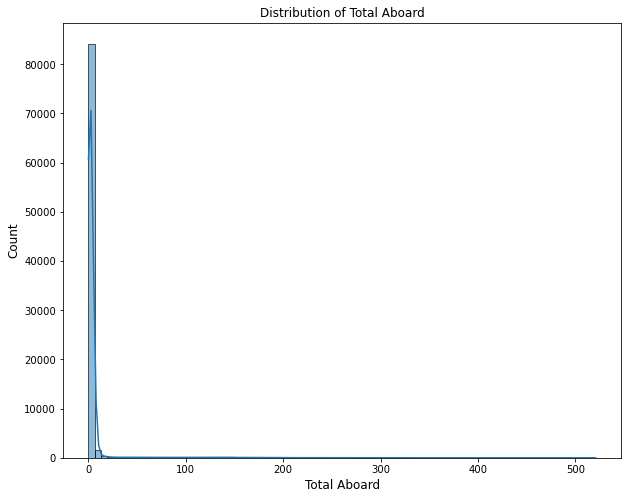

In [148]:
#plotting histogram of Total Aboard
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Total_Aboard, bins=80, kde=True)
plt.xlabel('Total Aboard', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Aboard', fontsize=12)
plt.show()

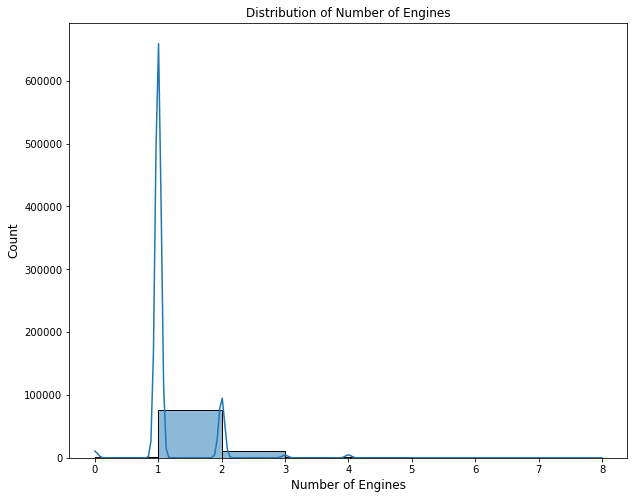

In [149]:
#plotting histogram of Number of Engines
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Number_of_Engines, kde=True, bins=8)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Engines', fontsize=12)
plt.show()

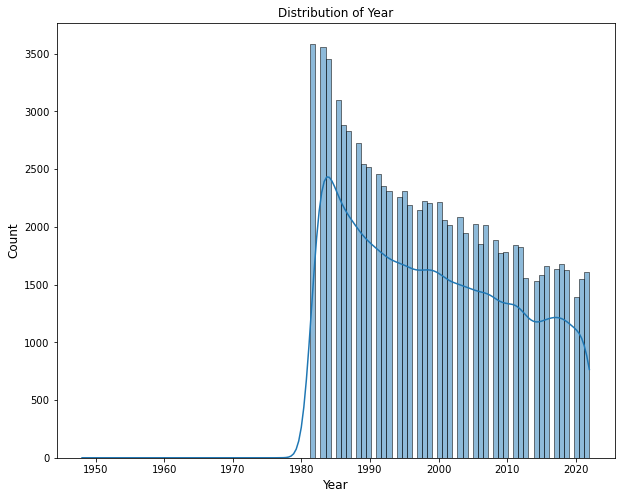

In [150]:
#plotting histogram of Year
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(df.Event_Year, kde=True, bins=100)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Year', fontsize=12)
plt.show()

##### Summary Observation

This indicates that our dataset has primary data collected from 1982 to 2023. The data from earlier years is scarce and cannot be accurately analysed.

In [151]:
df['Total_Fatal_Injuries'].mode()[0]

0.0

In [152]:
#measures of central tendency
columns = [['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Total_Aboard', 'Number_of_Engines', 'Event_Year']]

for column in columns:
  print("\n\n")
  print("The mean is categorised as follows: \n"+str(round(df[column].mean(), 2)))
  print("\n\n")
  print("The median is categorised as follows:\n"+str(df[column].median()))
  print("\n\n")
  print("The mode is categorised as follows:\n" +str(df[column].mode()))
  print("\n\n")
  print("The skew is categorised as follows:\n" + str(df[column].skew()))
  print("\n\n")
  print("The kurtosis is categorised as follows:\n" + str(df[column].kurtosis()))              





The mean is categorised as follows: 
Total_Fatal_Injuries         0.56
Total_Serious_Injuries       0.24
Total_Minor_Injuries         0.30
Total_Uninjured              5.00
Total_Aboard                 6.10
Number_of_Engines            1.14
Event_Year                1999.20
dtype: float64



The median is categorised as follows:
Total_Fatal_Injuries         0.0
Total_Serious_Injuries       0.0
Total_Minor_Injuries         0.0
Total_Uninjured              1.0
Total_Aboard                 2.0
Number_of_Engines            1.0
Event_Year                1998.0
dtype: float64



The mode is categorised as follows:
   Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  \
0                   0.0                     0.0                   0.0   

   Total_Uninjured  Total_Aboard  Number_of_Engines  Event_Year  
0              1.0           1.0                1.0        1982  



The skew is categorised as follows:
Total_Fatal_Injuries      33.875478
Total_Serious_Injuries    5

##### Summary of Observations for numerical columns

1. Majority of the accidents/incidents report zero or low injury distribution.
2. Some accidents have very high numbers (these could be inferred to commercial aircrafts) which are valid but rare.
3. Most incidents/accidents involve fewer than 10 people aboard which suggests a large portion of private/small aircraft
4. The total fatal, serious and minor injuries show strong positive skew which means most accidents result in few or no fatalities, while a small number have very high fatalities.
5. These variables also exhibit high kurtosis which indicates the presence of extreme outliers from commercial airline accidents.
6. Total passengers aboard also exhibits positive skew suggesting that majority of aircraft involved in accidents are small but a few carry very large numbers of passengers.
7. The distributions are not normal which is expected for aviation incident data due to rare but severe nature of fatal accidents.
8. The majority of aircraft involved in accidents/incidents have 1 engine followed by a smaller number with 2 engines.
9. Multi engine aircraft are rare, which may reflect that most accidents in the dataset involve private or small charter aircraft rather than large commercial jets
10. The skewness and kurtosis confirm that the data is right skewed with heavy tails reinforcing the need for median based summaries and careful handling of outliers in analysis.
11. The number of recorded incidents increased from the 1970s to the 1990s likely due to better reporting and increased air traffic. 
12. After the early 2000s, the trend shows a decline in accidents, possibly due to improved safety regulations, technology and training.
13. The dataset includes data upto 2023 and the most recent years appear to have fewer incidents. This could be influenced by reporting lag.


##### Implication

Smaller aircraft with fewer engines dominate the accident data. When selecting aircraft for commercial investment, models with more engines may offer safer performance with higher maintenance costs.

The declining trend in accidents over time is a positive signal for aviation safety. Huru Investments Group can factor in improved safety trends when assessing newer aircraft models for investment.

These observations set the stage for bivariate analysis where we compare variables to uncover risk factors.

##### 3.2.1.2 Categorical Columns

For the categorical columns we shall plot a count plot which shows the number of times each unique value occurs in a variable. It is often used to visualise the distribution of categorical variables.

The categorical columns we shall explore are:
* Investigation Type
* Country
* Make
* Model
* Injury Severity
* Weather Condition
* Aircraft Damage
* Aircraft Category
* Type of Engine
* Amateur Built

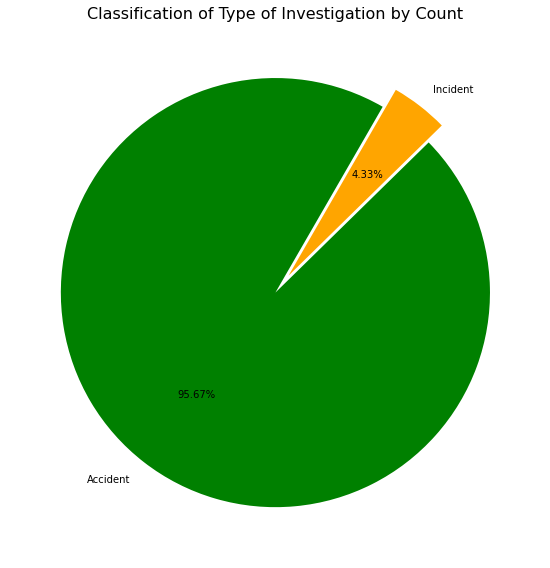

In [153]:
# plotting the type of investigation carried out for aircraft in our dataset

investigation = df['Investigation_Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(investigation, labels=investigation.index, autopct='%1.2f%%', startangle=60, colors=['green', 'orange'], explode=[0.0,0.1])
plt.title('Classification of Type of Investigation by Count', fontsize=16)
plt.tight_layout()
plt.show()

##### Summary
The dataset contains significantly more records classified as accidents compared to incidents. This confirms that majority of entries involve events with substantial consequences such as injuries, fatalities or major aircraft damage. Incidents which typically involve no serious injuries or damage form a much smaller proportion of the data.

The dataset is therefore primarily focused on major events rather than minor or procedural issues.

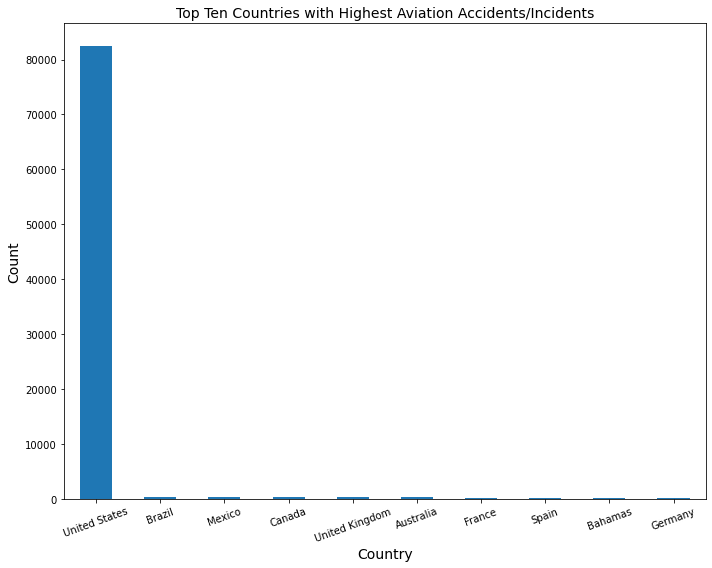

In [154]:
# plotting top 10 countries with aviation accidents/incidents

top_10_count = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,8))
top_10_count.plot(kind='bar')
plt.title('Top Ten Countries with Highest Aviation Accidents/Incidents', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

##### Summary
* The majority of records are from the United States. This is probably due to the detailed reporting by NTSB. 
* Other countries have significantly fewer records, possibly due to underreporting or limited international coverage of data by the NTSB

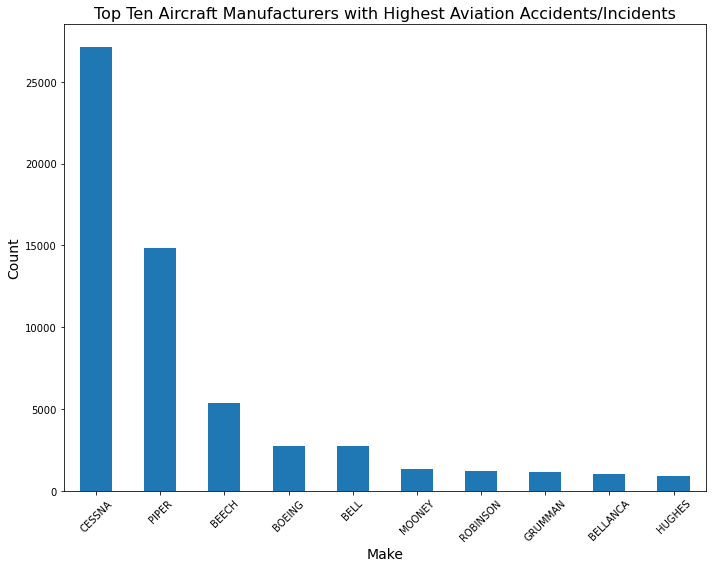

In [155]:
# plotting top 10 Makes of Aircraft with aviation accidents/incidents

top_10_Make = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,8))
top_10_Make.plot(kind='bar')
plt.title('Top Ten Aircraft Manufacturers with Highest Aviation Accidents/Incidents', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary

* Cessna and Piper makes of Aircraft dominate the majority of accidents/incidents reflecting the high numbers of small general aviation aircraft.
* Large commercial manufacturers like Boeing appear less frequently aligning with their small market share in total aircraft volume and possibility of lower safety risk associated with technology employed in them.

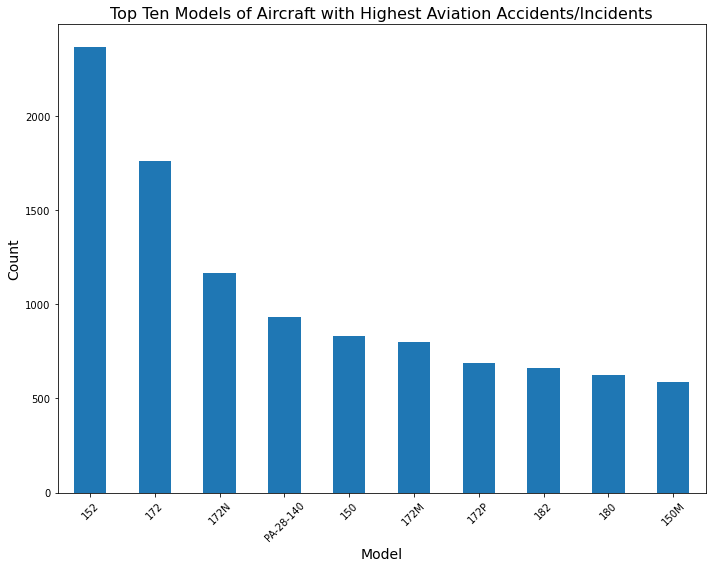

In [156]:
# plotting top 10 Models of Aircraft with aviation accidents/incidents

top_10_Model = df['Model'].value_counts().head(10)

plt.figure(figsize=(10,8))
top_10_Model.plot(kind='bar')
plt.title('Top Ten Models of Aircraft with Highest Aviation Accidents/Incidents', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary

The most common aircraft models are the small single engine types used in general aviation. With majority being of the Cessna Make.

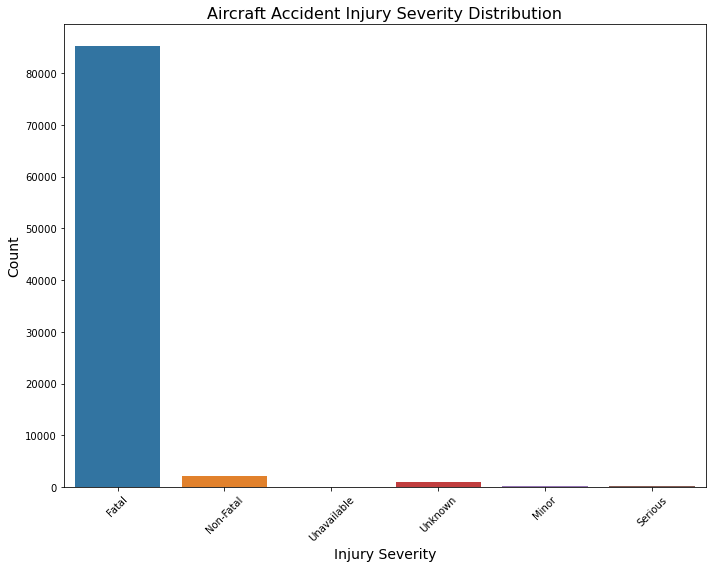

In [157]:
#plotting the Injury Severity Distribution
plt.figure(figsize=(10,8))
sns.countplot(x='Injury_Severity', data=df)
plt.title('Aircraft Accident Injury Severity Distribution', fontsize=16)
plt.xlabel('Injury Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary 
The majority of accidents in the dataset are classified as fatal followed by smaller proportions of serious and minor events. 

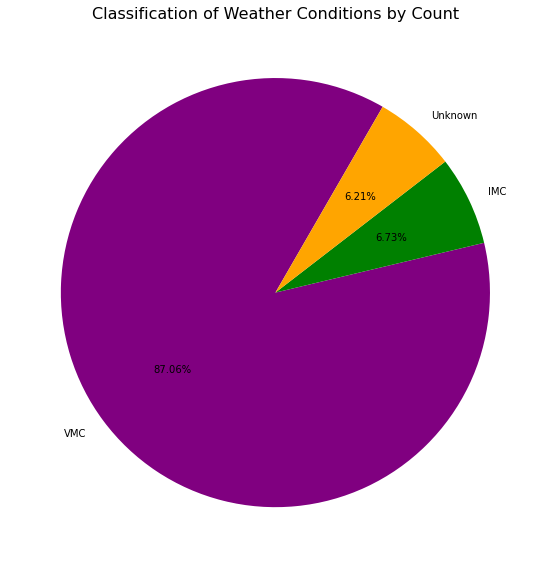

In [158]:
# plotting the prevailing weather conditions during the accidents/incidents

weather = df['Weather_Condition'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(weather, labels=weather.index, autopct='%1.2f%%', startangle=60, colors=['purple', 'green', 'orange'])
plt.title('Classification of Weather Conditions by Count', fontsize=16)
plt.tight_layout()
plt.show()

##### Summary

Most Accidents occure under VMC(Visual Meteorological Conditions. IMC (Instrumental Meteorological Conditions are less common but important to flag for deeper analysis later.

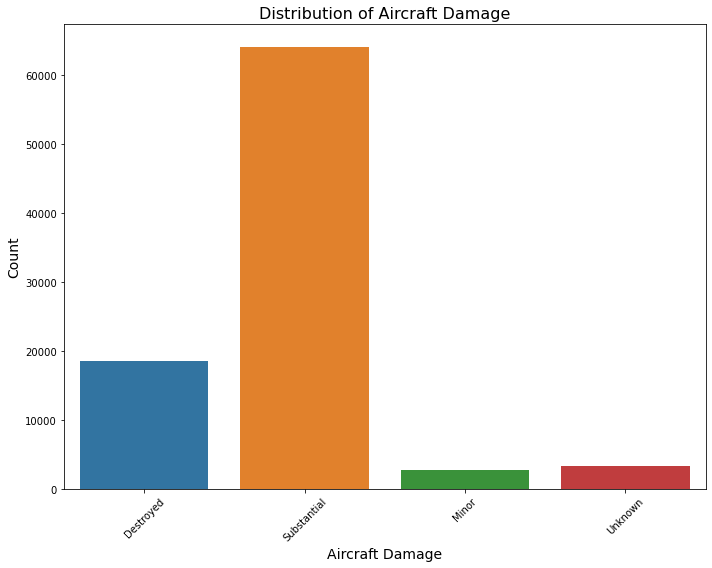

In [159]:
#plotting Aircraft Damage distribution
plt.figure(figsize=(10,8))
sns.countplot(x='Aircraft_damage', data=df)
plt.title('Distribution of Aircraft Damage', fontsize=16)
plt.xlabel('Aircraft Damage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary

Most aircraft involved in accidents in the dataset are seen to be substantially damaged or destroyed. This confirms that the dataset captures mostly serious events.

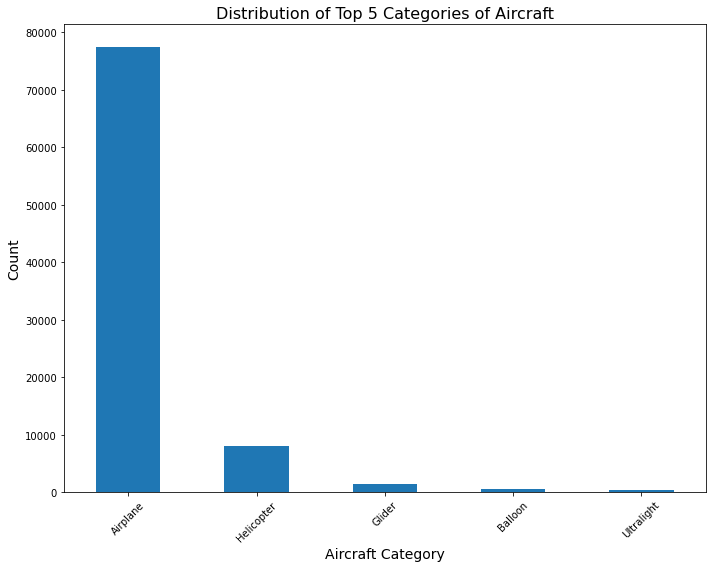

In [160]:
#plotting top 5 aircraft categories distribution
top_5_category = df['Aircraft_Category'].value_counts().head(5)

plt.figure(figsize=(10,8))
top_5_category.plot(kind='bar')
plt.title('Distribution of Top 5 Categories of Aircraft', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary

Most accidents/incidents involve airplanes, often single engine fixed wing types. Rotorcraft and gliders make up a small percentage.

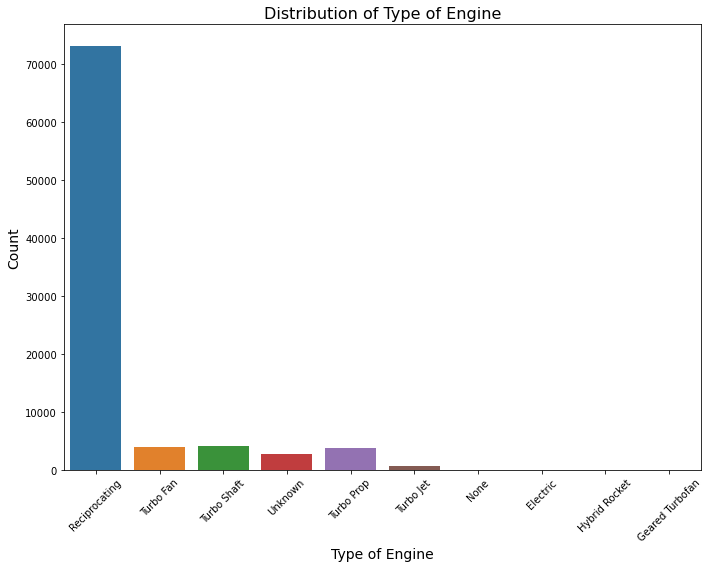

In [161]:
#plotting Type of Engine distribution
plt.figure(figsize=(10,8))
sns.countplot(x='Engine_Type', data=df)
plt.title('Distribution of Type of Engine', fontsize=16)
plt.xlabel('Type of Engine', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Summary

Most aircraft involved in accidents use reciprocating engines which is consistent with the high number of general aviation aircraft.

Turboprop and Turbo Jet are less common but relevant for commercial and military aircraft.

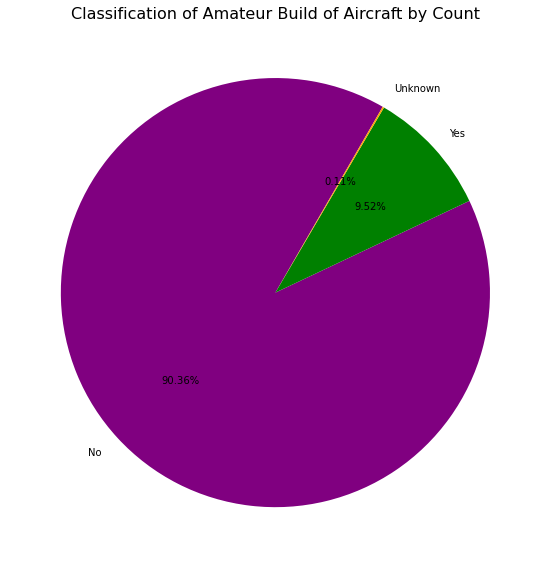

In [162]:
# plotting the type of build of aircraft

build = df['Amateur_Built'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(build, labels=build.index, autopct='%1.2f%%', startangle=60, colors=['purple', 'green', 'orange'])
plt.title('Classification of Amateur Build of Aircraft by Count', fontsize=16)
plt.tight_layout()
plt.show()

##### Summary
A majority of the aircraft involved in accidents/incidents are factory built. A noticeable portion is amateur built which may carry operational risk. This can be further explored in bivariate analysis

#### Summary of Univariate Analysis of Categorical Variables
- The dataset is heavily skewed toward aircraft accidents with many accidents involving small, single-engine, factory-built aircraft operating in the United States.
- Most accidents occurred under good weather (VMC), and damage to aircraft was often substantial or total destruction.
- The consequences of fatal accidents are severe and relevant for business risk analysis.

#### 3.2.2 Bi-Variate Analysis

This section explores relationships between two key variables to identify patterns that may influence the severity of aviation accidents or fatality rate. The focus is on factors that could influence them like weather conditions, aircraft specifications, and aircraft type — all of which can inform Huru Capital Investment Group’s aircraft safety and risk assessment framework for business decision making.

The aim is to uncover patterns that may inform aviation safety recommendations and investment risk for Huru Capital Investments Group. 

Some analytical questions we hope to answer are:
1. Do accidents and incidents differ in severity?
2. Does weather condition influence injury severity?
3. Which aircraft make has the highest number of fatal accidents?
4. Do amateur built aircrafts experience more fatalities than factory built ones?

##### 3.2.2.1 Comparison of  Investigation Type and Injury Severity

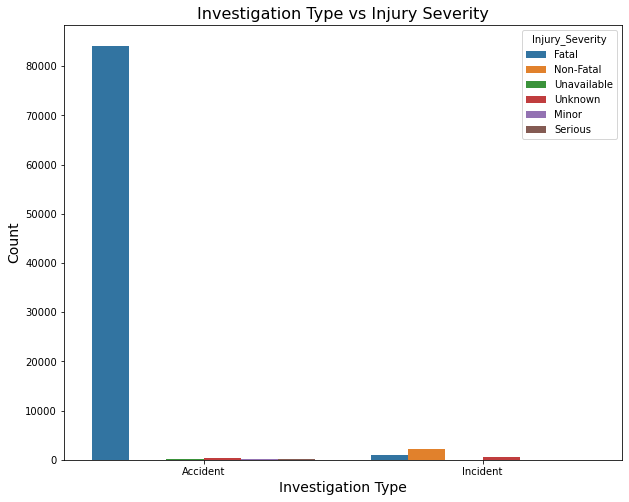

In [163]:
#plotting bar plot for investigation type and injury severity
plt.figure(figsize=(10,8))
sns.countplot(x = "Investigation_Type", hue= "Injury_Severity", data=df);
plt.title('Investigation Type vs Injury Severity', fontsize=16)
plt.xlabel('Investigation Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

##### Summary

As expected, the chart shows that nearly all fatal and serious injuries occur in investigations classified as accidents while incidents tend to result in no injuries or minor ones.

This confirms that the Investigation Type strongly correlates with severity and that fatal events are almost exclusively reported as formal accidents.

##### 3.2.2.2 Comparison of Weather Condition and Injury Severity

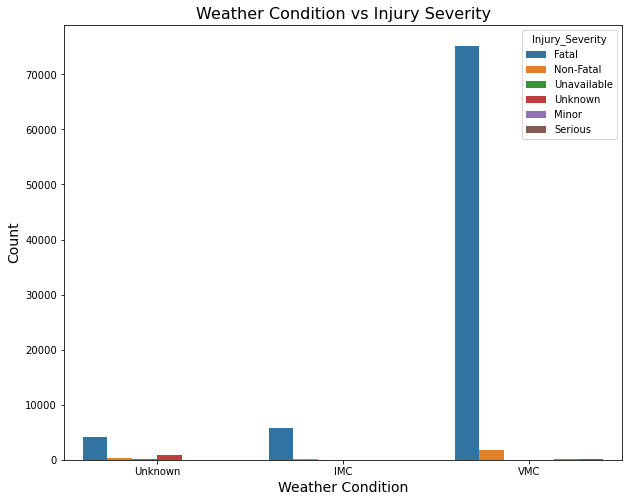

In [164]:
#plotting bar plot for weather condition and injury severity
plt.figure(figsize=(10,8))
sns.countplot(x = "Weather_Condition", hue= "Injury_Severity", data=df);
plt.title('Weather Condition vs Injury Severity', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

##### Observation Summary

The analysis shows that *VMC (Visual Meteorological Conditions)* had a higher number of fatal accidents compared to IMC.

IMC is typically associated with greater flying difficulty. However, the result can be explained by:

- VMC flights outnumber IMC flights in our dataset given the majority of general aviation and small aircraft fly in VMC by default.
- Greater use of VMC by general aviation and amateur-built aircraft which are flown in remote areas with limited safety margins, which are overrepresented in accident reports.
- Human factors: fatal crashes in VMC often result from mechanical failure or pilot error, not necessarily weather.

While IMC presents more navigational challenges, the sheer volume of VMC flights — especially among high-risk segments — leads to more fatal outcomes in absolute numbers. 

##### 3.2.2.3 Comparison of Weather Condition and Fatality Rates

This aims to answer out of all flights in VMC or IMC how many resulted in fatalities?

Weather_Condition
IMC        0.579555
Unknown    0.372439
VMC        0.158794
Name: Fatal_Accident, dtype: float64


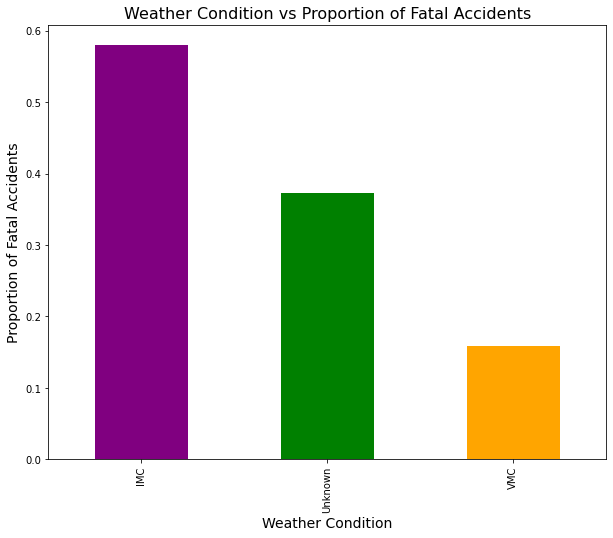

In [165]:
#creating a fatal accident column
df['Fatal_Accident'] = df['Total_Fatal_Injuries'].fillna(0) > 0

#grouping the Fatal Accidents by Weather
fatalities_weather = df.groupby('Weather_Condition')['Fatal_Accident'].mean().sort_values(ascending=False)
print(fatalities_weather)

#plotting the fatality rate
plt.figure(figsize=(10,8))
fatalities_weather.plot(kind='bar', color = ['purple','green','orange'])
plt.title('Weather Condition vs Proportion of Fatal Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Proportion of Fatal Accidents', fontsize=14)
plt.show()

##### Summary Observation
Although VMC conditions account for more fatal accidents in total, the *fatality rate per flight is higher under IMC* (Instrument Meteorological Conditions).

This indicates that IMC environments are riskier overall, with a greater likelihood of a fatal outcome when an accident occurs. 

- VMC is more common, so the total fatality count is higher.
- IMC flights, while fewer, are more complex and unforgiving — especially for undertrained pilots or small aircraft.

This insight is vital for Huru Capital when evaluating safety risks in relation to aircraft type, pilot qualifications, and expected flight environments.

##### 3.2.2.4 Comparison of Aircraft Damage and Fatality Rate
This plot aims to visualise how the level of physical damage to the aircraft relates to the number of fatal accidents(fatality rate) reported.

Aircraft_damage
Destroyed      0.678199
Unknown        0.077484
Substantial    0.075010
Minor          0.038998
Name: Fatal_Accident, dtype: float64


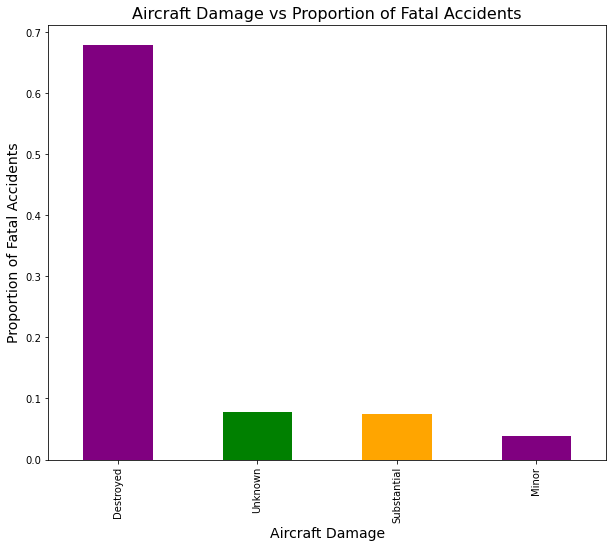

In [166]:
#grouping the Fatal Accidents by Aircraft Damage
fatalities_damage = df.groupby('Aircraft_damage')['Fatal_Accident'].mean().sort_values(ascending=False)
print(fatalities_damage)

#plotting aircraft damage versus fatality rate
plt.figure(figsize=(10,8))
fatalities_damage.plot(kind='bar', color = ['purple','green','orange'])
plt.title('Aircraft Damage vs Proportion of Fatal Accidents', fontsize=16)
plt.xlabel('Aircraft Damage', fontsize=14)
plt.ylabel('Proportion of Fatal Accidents', fontsize=14)
plt.show()

##### Summary Observation
The fatality rate per accident is highest for aircraft classified as destroyed. This shows that destroyed aircraft are far more likely to involve fatal outcomes.

##### 3.2.2.5 Aircraft Category versus fatality rate

This shows which types of aircraft are most likely to be involved in fatal accidents.

Aircraft_Category
Rocket               1.000000
Unknown              0.417219
Weight-Shift         0.360656
Gyrocraft            0.289377
Helicopter           0.210067
Airplane             0.200315
Ultralight           0.181641
Powered Parachute    0.156250
Glider               0.146154
Balloon              0.086207
Powered-Lift         0.000000
Blimp                0.000000
Name: Fatal_Accident, dtype: float64


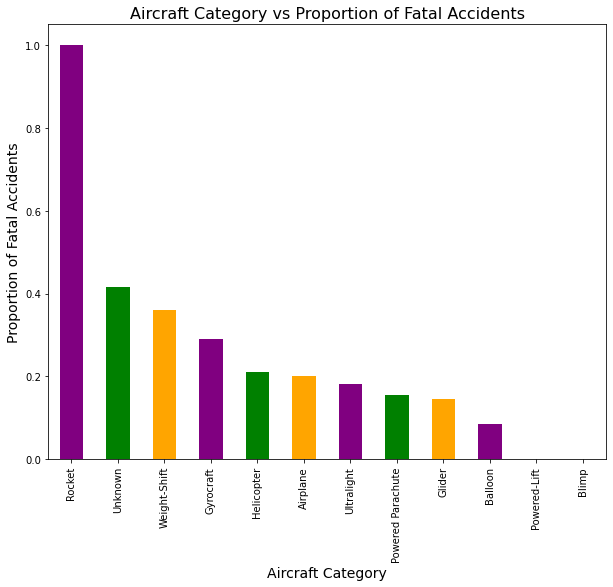

In [167]:
#grouping the Fatal Accidents by Aircraft Category
fatalities_category = df.groupby('Aircraft_Category')['Fatal_Accident'].mean().sort_values(ascending=False)
print(fatalities_category)

#plotting aircraft damage versus fatality rate
plt.figure(figsize=(10,8))
fatalities_category.plot(kind='bar', color = ['purple','green','orange'])
plt.title('Aircraft Category vs Proportion of Fatal Accidents', fontsize=16)
plt.xlabel('Aircraft Category', fontsize=14)
plt.ylabel('Proportion of Fatal Accidents', fontsize=14)
plt.show()

##### Summary Observation
- Rocket, Weight-Shift, and Gyrocraft show the highest fatality rates. These aircraft types are high-risk by design, often with minimal structural protection, limited safety equipment, and typically flown by non-commercial pilots.
- Helicopters also show a relatively high fatal accident proportion, likely due to the complexity of operation and sensitivity to engine failure during low-altitude flight.
- Airplanes, although the most common type of aircraft, ranks mid-range in fatality rate — confirming that they are generally safer per flight compared to more experimental or recreational craft.
- Powered Parachutes, Gliders, and Balloons have surprisingly low fatality rates, potentially due to slower speeds and lighter structures reducing impact force.
- Blimps and Powered Lift (e.g., tiltrotors) appear the safest in this dataset, though they are very rare and may not be sufficiently represented to draw strong conclusions.

##### Business Insight:

For Huru Capital Investments Group, this analysis supports risk scoring by aircraft category. Categories like Rocket, Gyrocraft, and Weight-Shift should be flagged as high-risk investment classes, especially if used in non-commercial or amateur settings. 

More traditional categories like certified airplanes or powered lift aircraft pose lower relative fatality risk and may represent safer, more stable investment opportunities.

##### 3.2.2.6 Amateur Built versus Fatality Rate
This plot compares the Fatality Rate between certified factory built aircraft and those built by amateurs.

Amateur_Built
Unknown    0.330000
Yes        0.277541
No         0.192076
Name: Fatal_Accident, dtype: float64


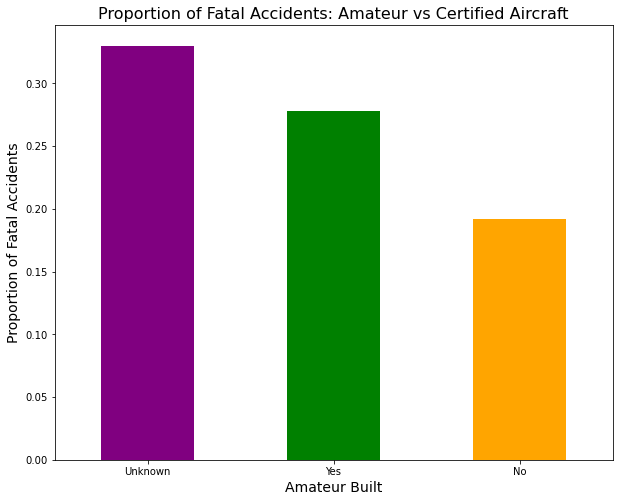

In [168]:
#grouping the Fatal Accidents by Amateur Built
fatalities_amateur = df.groupby('Amateur_Built')['Fatal_Accident'].mean().sort_values(ascending=False)
print(fatalities_amateur)

#plotting amateur built versus fatality rate
plt.figure(figsize=(10,8))
fatalities_amateur.plot(kind='bar', color = ['purple','green','orange'])
plt.title('Proportion of Fatal Accidents: Amateur vs Certified Aircraft', fontsize=16)
plt.xlabel('Amateur Built', fontsize=14)
plt.ylabel('Proportion of Fatal Accidents', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Summary Observation

Amateur built aircraft have a noticeably higher rate of fatal accidents compared to factory built aircraft. This is an important risk signal for future asset selection.

##### 3.2.2.7  Aircraft Make versus Fatal Accidents

This analysis investigates the top 10 makes and their rate of fatal accidents.

Make
BEECH       0.293187
ROBINSON    0.283740
MOONEY      0.281859
PIPER       0.215467
BELL        0.214469
BELLANCA    0.204785
CESSNA      0.170761
HUGHES      0.145923
GRUMMAN     0.111775
BOEING      0.060904
Name: Fatal_Accident, dtype: float64


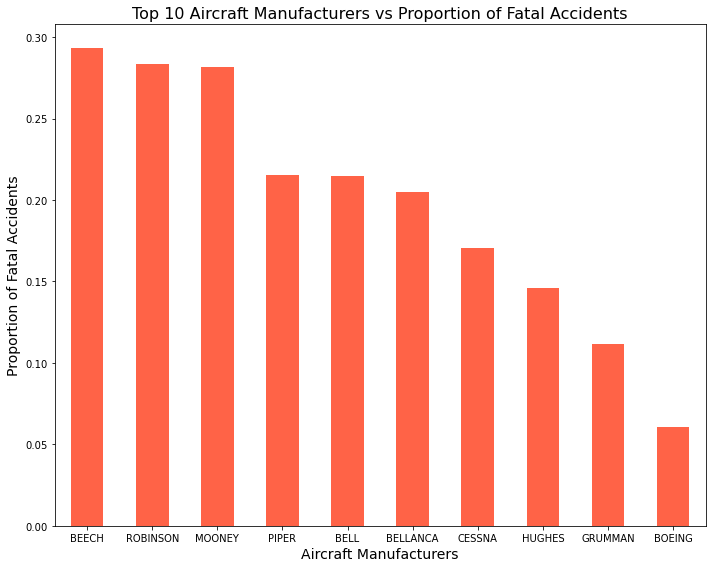

In [169]:
#get index of top 10 makes
top_makes = df['Make'].value_counts().head(10).index

#create df with top 10 makes
df_top_makes=df[df['Make'].isin(top_makes)]

#grouping the Fatal Accidents by Make
fatalities_make = df_top_makes.groupby('Make')['Fatal_Accident'].mean().sort_values(ascending=False)
print(fatalities_make)

#plotting amateur built versus fatality rate
plt.figure(figsize=(10,8))
fatalities_make.plot(kind='bar', color ='tomato')
plt.title('Top 10 Aircraft Manufacturers vs Proportion of Fatal Accidents', fontsize=16)
plt.xlabel('Aircraft Manufacturers', fontsize=14)
plt.ylabel('Proportion of Fatal Accidents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Summary Observation

- Beech, Mooney, Piper, and Cessna are all popular general aviation manufacturers. While widely used, their relatively high fatality rates may reflect their prevalence in small, private, or low-budget operations where pilot training and maintenance may vary.
  
- Robinson and Bell are manufacturers of helicopters. Their high fatality rates align with the known operational risks of rotary-wing aircraft, particularly during auto-rotation emergencies or low-altitude failures.

- Boeing, while a major commercial aircraft manufacturer, appears last in the ranking, showing the lowest fatality rate among the top 10. This suggests that large commercial jets, despite their size and complexity, have superior safety records, likely due to professional crews, stringent maintenance, and advanced safety systems.

##### Business Implication:

This analysis offers a clear basis for risk stratification by aircraft make. Huru Capital Investments Group can:

- Flag Beech, Robinson, Mooney, and Bell aircraft as higher-risk investments that may require stricter operational vetting or insurance oversight.
- Consider aircraft from manufacturers with lower historical fatality rates (e.g., Boeing, Grumman) as lower-risk candidates for long-term investment or leasing.

##### 3.2.2.8 Fatality Rate by Aircraft Model

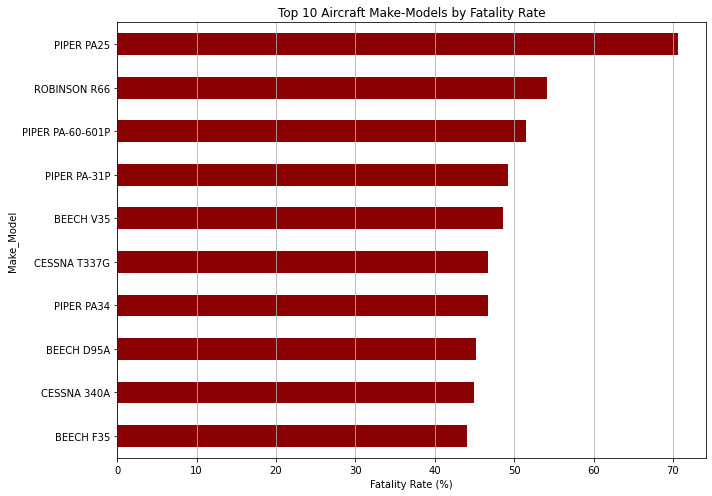

In [170]:
# Combine Make and Model into one column
df['Make_Model'] = df_top_makes['Make'].astype(str) + ' ' + df_top_makes['Model'].astype(str)

# Group and aggregate
make_model_stats = df.groupby('Make_Model').agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Aboard': 'sum',
    'Event_Id': 'count'  # counts total accidents
}).rename(columns={'Event_Id': 'Accident_Count'})

# Calculate fatality rate
make_model_stats['Fatality_Rate (%)'] = (make_model_stats['Total_Fatal_Injuries'] / make_model_stats['Total_Aboard']) * 100

# Filter to models with enough data (e.g., at least 20 accidents)
filtered_models = make_model_stats[make_model_stats['Accident_Count'] >= 20]

# Sort by fatality rate
top_fatal_rates = filtered_models.sort_values(by='Fatality_Rate (%)', ascending=False).head(10)

top_fatal_rates['Fatality_Rate (%)'].sort_values().plot(
    kind='barh', figsize=(10, 7), color='darkred'
)

plt.xlabel('Fatality Rate (%)')
plt.title('Top 10 Aircraft Make-Models by Fatality Rate')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

##### Summary Observation
- Piper, Beech and Cessna aircraft dominate the list, many of which are high-performance general aviation planes — often older, faster, and more complex.
- The Robinson R66, a helicopter, is known for both widespread use and controversial safety performance.

##### Business Risk Implications for Huru Capital Investments Group:
These aircraft types should be flagged for deeper due diligence:
- Age of the fleet
- Maintenance history
- Pilot training levels
- Operating environment (e.g., agricultural flying vs corporate travel)

Avoid investing in companies using these models unless robust safety and training systems are in place.

Use this list as part of a risk scoring system for aircraft acquisition.

##### 3.2.2.9 Trend Analysis of fatality rate

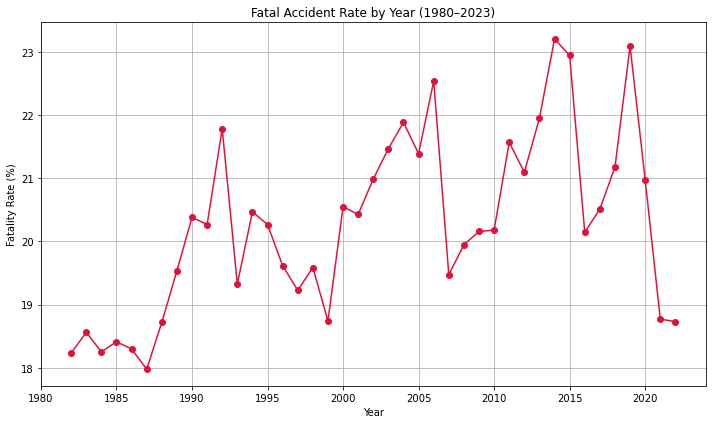

In [171]:
# Group by Year and calculate total accidents and fatal accidents
yearly_stats = df.groupby('Event_Year')['Fatal_Accident'].agg(['count', 'sum'])

# Rename columns for clarity
yearly_stats.columns = ['Total_Accidents', 'Fatal_Accidents']

# Calculate fatality rate (% of accidents that were fatal)
yearly_stats['Fatality_Rate (%)'] = (yearly_stats['Fatal_Accidents'] / yearly_stats['Total_Accidents']) * 100

# Filter for realistic range
yearly_stats = yearly_stats[(yearly_stats.index >= 1982) & (yearly_stats.index <= 2023)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats['Fatality_Rate (%)'], marker='o', color='crimson', linestyle='-')
plt.title('Fatal Accident Rate by Year (1980–2023)')
plt.xlabel('Year')
plt.ylabel('Fatality Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Summary Observation

From 1981 onwards, the fatal accident rate has consistently ranged between 18-25%, with minor fluctuations across decades. Overall, aviation accidents are becoming less fatal per accident signaling improved safety protocols and survivability.

#### 3.2.3 Multi Variate Analysis
Multivariate analysis is a statistical technique used to describe and summarize the relationship between three or more variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.


Multivariate analysis can be used to answer a variety of questions about the relationship between three or more variables, such as:

* What are the most important factors that influence a particular outcome?
* How can we group observations into clusters based on their similarity?
* How can we classify observations into two or more groups based on their characteristics?

##### Safest Aircraft  Manufacturers

In [172]:
#Group by Top 10 Makes
make_safety = df_top_makes.groupby('Make').agg(
    Fatal_Accident_Count=('Fatal_Accident', 'sum'),
    Total_Accidents=('Fatal_Accident', 'count'),
    Total_Fatal_Injuries=('Total_Fatal_Injuries', 'sum'),
    Total_Aboard=('Total_Aboard', 'sum')
).reset_index()

#Compute safety metrics
make_safety['Fatal_Accident_Rate'] = (make_safety['Fatal_Accident_Count'] / make_safety['Total_Accidents']) * 100
make_safety['Fatality_Rate'] = (make_safety['Total_Fatal_Injuries']/make_safety['Total_Aboard'])*100

#Keep aircraft with enough accident records to be meaningful/reliable
make_safety_filtered = make_safety[(make_safety['Total_Accidents'] >= 20) & (make_safety['Total_Aboard'] >= 50)]

#Sort by lowest fatal accident rate
safest_makes = make_safety_filtered.sort_values(by='Fatal_Accident_Rate').head(10)

#Display as a pivot style table
safest_makes[['Make', 'Fatal_Accident_Count', 'Total_Accidents', 'Total_Fatal_Injuries', 
                 'Total_Aboard', 'Fatal_Accident_Rate', 'Fatality_Rate']].style \
    .format({'Fatal_Accident_Rate (%)': '{:.2f}%', 'Fatality_Rate (%)': '{:.2f}%'}) \
    .background_gradient(cmap='Greens', subset=['Fatality_Rate']) \
    .set_caption("Top 10 Safest Aircraft Manufacturers by Fatal Accident Rate")

,Make,Fatal_Accident_Count,Total_Accidents,Total_Fatal_Injuries,Total_Aboard,Fatal_Accident_Rate,Fatality_Rate
3,BOEING,167,2742,8711.000000,219066.000000,6.090445,3.976427
5,GRUMMAN,131,1172,248.000000,1960.000000,11.177474,12.653061
6,HUGHES,136,932,203.000000,1956.000000,14.592275,10.378323
4,CESSNA,4636,27149,9641.000000,57283.000000,17.076135,16.830473
2,BELLANCA,214,1045,345.000000,1767.000000,20.478469,19.524618
1,BELL,584,2723,1333.000000,6631.000000,21.446934,20.102549
8,PIPER,3204,14870,6689.000000,32191.000000,21.546738,20.779100
7,MOONEY,376,1334,685.000000,2736.000000,28.185907,25.036550
9,ROBINSON,349,1230,618.000000,2440.000000,28.373984,25.327869
0,BEECH,1575,5372,3784.000000,14550.000000,29.318690,26.006873


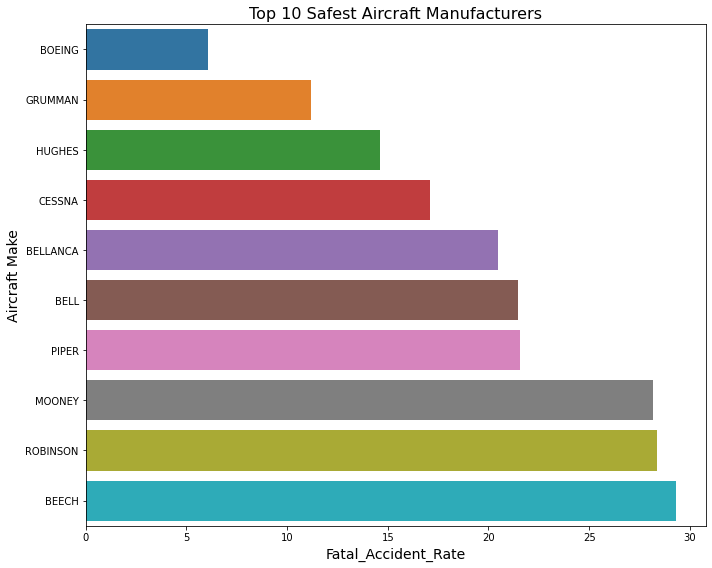

In [173]:
# Plotting bargraph
plt.figure(figsize=(10, 8))
sns.barplot(
    data=safest_makes,
    x='Fatal_Accident_Rate',
    y='Make'
)
plt.title('Top 10 Safest Aircraft Manufacturers', fontsize = 16)
plt.xlabel('Fatal_Accident_Rate', fontsize = 14)
plt.ylabel('Aircraft Make', fontsize=14)
plt.tight_layout()
plt.show()

##### Summary Observation
The top 3 safest aircraft manufacturers with the lowest fatality rates are Boeing (commercial aircraft), Grumann (military aircraft) and Hughes.

##### Fatality Rate by Aircraft Category and Number of Engines

   Aircraft_Category  Number_of_Engines  Total_Fatal_Injuries  Total_Aboard  \
34      Weight-Shift                0.0                   1.0           1.0   
33           Unknown                4.0                   6.0           6.0   
32           Unknown                3.0                  12.0          12.0   
27            Rocket                1.0                   1.0           2.0   
35      Weight-Shift                1.0                  83.0         260.0   
18         Gyrocraft                1.0                  87.0         346.0   
9            Balloon                2.0                   9.0          36.0   
22        Helicopter                3.0                   1.0           5.0   
19        Helicopter                0.0                  21.0         105.0   
20        Helicopter                1.0                3089.0       16397.0   

    Fatality_Rate (%)  
34         100.000000  
33         100.000000  
32         100.000000  
27          50.000000  
35        

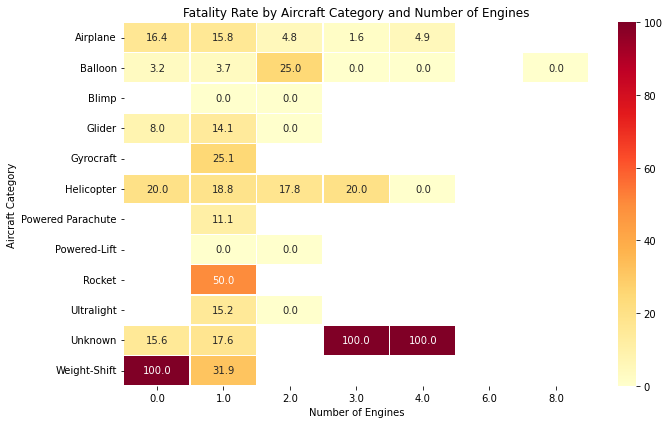

In [174]:
#groupby Aircraft Category and Number of Engines with a 
df_grouped_1 = df.groupby(['Aircraft_Category', 'Number_of_Engines']).agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Aboard': 'sum'
}).reset_index()

#compute the Fatality Rate
df_grouped_1['Fatality_Rate (%)'] = (df_grouped_1['Total_Fatal_Injuries'] / df_grouped_1['Total_Aboard']) * 100

#sort by the highest fatality rates
print(df_grouped_1.sort_values('Fatality_Rate (%)', ascending=False).head(10))

# Prep the data
heatmap_data = df_grouped_1.pivot(
    index='Aircraft_Category',
    columns='Number_of_Engines',
    values='Fatality_Rate (%)'
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title('Fatality Rate by Aircraft Category and Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Aircraft Category')
plt.tight_layout()
plt.show()

##### Summary Observation

Weightshift Control aircraft with a single engine had the highest fatality rate among all categories suggesting that this configuration carries significant risk and should be avoided for investment. We also note that majority of the aircraft with 1 engine such as the Rocket and Gyrocraft should also be avoided for investment.

##### Fatal Accidents by Weather Condition and Aircraft Damage

In [175]:
severity_table = pd.crosstab(
    [df['Weather_Condition'], df['Aircraft_damage']],
    df['Fatal_Accident'],
    normalize='index'
).round(2)

severity_table.head(10)

Fatal_Accident                     False  True 
Weather_Condition Aircraft_damage              
IMC               Destroyed         0.12   0.88
                  Minor             0.99   0.01
                  Substantial       0.77   0.23
                  Unknown           0.97   0.03
Unknown           Destroyed         0.15   0.85
                  Minor             0.99   0.01
                  Substantial       0.67   0.33
                  Unknown           0.92   0.08
VMC               Destroyed         0.39   0.61
                  Minor             0.95   0.05

##### Summary Observation

We can deduce that the highest number of fatal accidents occurred during Instrument Meteorological Conditions(IMC) combined with destroyed aircraft damage. Fatal Accidents still occurred under Visual Meteorological Conditions (VMC) suggesting that visual weather conditions do not fully mitigate risk when the aircraft sustains major damage. 

This highlights the need for robust aircraft integrity and safety procedures regardless of the weather.

##### Fatality Rate by Top 10 Aircraft Make and Amateur Built

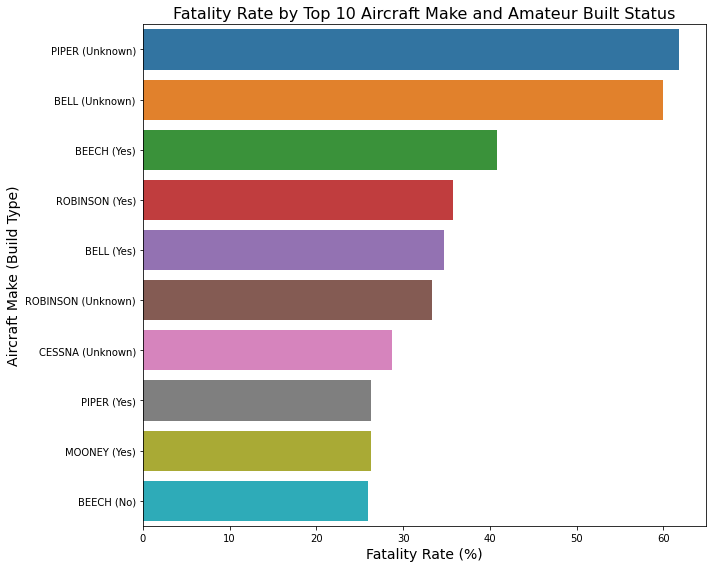

In [176]:
#groupby the Make, Amateur Built and the columns to compute Fatality Rate
df_grouped_3= df_top_makes.groupby(['Make', 'Amateur_Built']).agg({
    'Total_Fatal_Injuries': 'sum',
    'Total_Aboard': 'sum'
}).reset_index()


#compute fatality rate
df_grouped_3['Fatality_Rate(%)'] = (df_grouped_3['Total_Fatal_Injuries'] / df_grouped_3['Total_Aboard']) * 100

# Sort and filter top riskiest
df_grouped_3_sorted = df_grouped_3.sort_values('Fatality_Rate(%)', ascending=False).head(10)

# Combine Make + Build for labeling
df_grouped_3_sorted['Make_Build'] = df_grouped_3_sorted['Make'] + " (" + df_grouped_3_sorted['Amateur_Built'] + ")"

# Plotting bargraph
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_grouped_3_sorted,
    x='Fatality_Rate(%)',
    y='Make_Build'
)
plt.title('Fatality Rate by Top 10 Aircraft Make and Amateur Built Status', fontsize = 16)
plt.xlabel('Fatality Rate (%)', fontsize = 14)
plt.ylabel('Aircraft Make (Build Type)', fontsize=14)
plt.tight_layout()
plt.show()

##### Summary Observation

We note that a majority of aircraft which were Amateur Built had the highest fatality rate. Investment should therefore focus on certified aircraft manufacturers.

#### Summary of Conculsion of Multi Variate Analysis

In this section, we combined multiple variables to understand how different aircraft and operational features affect accident outcomes. Our key insights include:

- *Aircraft design risk:* Certain combinations (e.g., weight-shift control with 1 engine) had consistently high fatality rates.
- *Weather vs damage severity:* Weather alone is not a strong protective factor if the aircraft is destroyed or sustains substantial damage.
- *Build quality matters:* Factory-built aircraft had significantly lower fatality rates compared to amateur-built makes.

These insights directly inform Huru Capital Investments' decisions on which aircraft types and configurations are safest for expansion.

## 4. Recommendations

* Prioritize investment in aircraft makes with historically low accident and fatality rates such as Boeing, Grumann and Hughes
* Develop a risk scoring framework for top fatal aircraft models and either avoid or subject these aircraft to enhanced inspection, pilot training or operational limits
* For commercial/high value operations, prioritize investing in certified factory built aircraft
* Prioritize multi engine aircraft for low visibility weather conditions.
